Laplace Mechanism Results:
     Feature  Scale        MSE      RMSE        Mean      Median
0        Age    0.5   0.520549  0.721491   54.372752   55.305442
1        Sex    0.5   0.492297  0.701639    0.682482    0.811035
2         Cp    0.5   0.553190  0.743768    0.937910    0.800539
3   Trestbps    0.5   0.541665  0.735979  131.659207  129.857216
4       Chol    0.5   0.460159  0.678350  246.210725  240.311271
5        Fbs    0.5   0.551795  0.742829    0.113007    0.082788
6    Restecg    0.5   0.370680  0.608835    0.535756    0.622086
7    Thalach    0.5   0.402739  0.634617  149.594852  152.679119
8      Exang    0.5   0.550497  0.741955    0.313947    0.309683
9    Oldpeak    0.5   0.457346  0.676273    1.039630    0.874256
10     Slope    0.5   0.529997  0.728009    1.411671    1.449667
11        Ca    0.5   0.414542  0.643849    0.685420    0.361784
12      Thal    0.5   0.561838  0.749558    2.349445    2.280759
13    Target    0.5   0.414639  0.643924    0.555445    0.58817

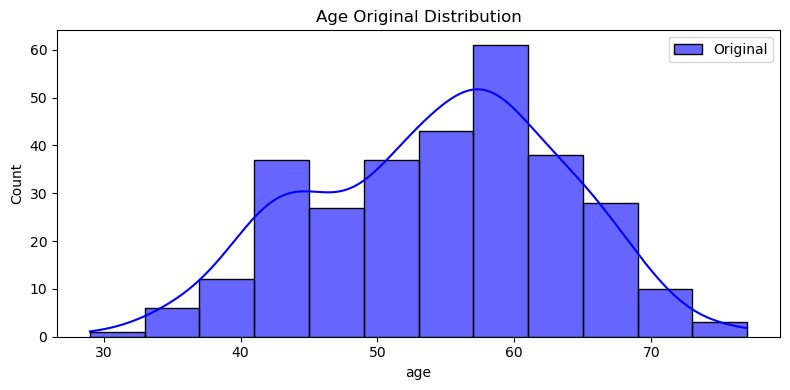

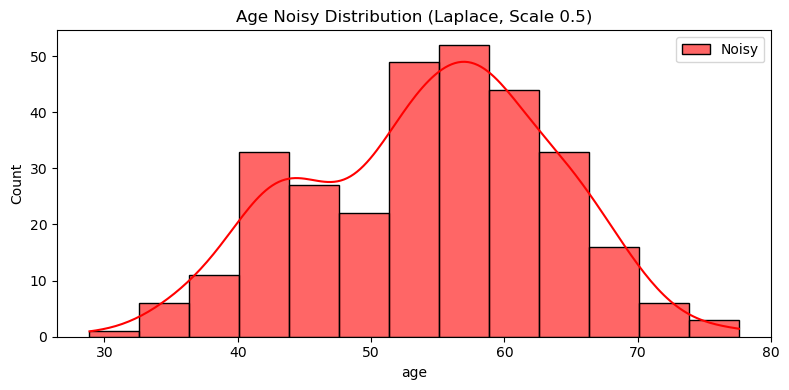

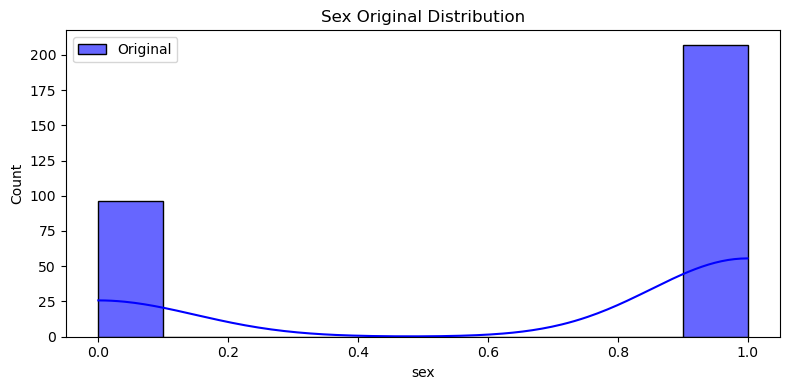

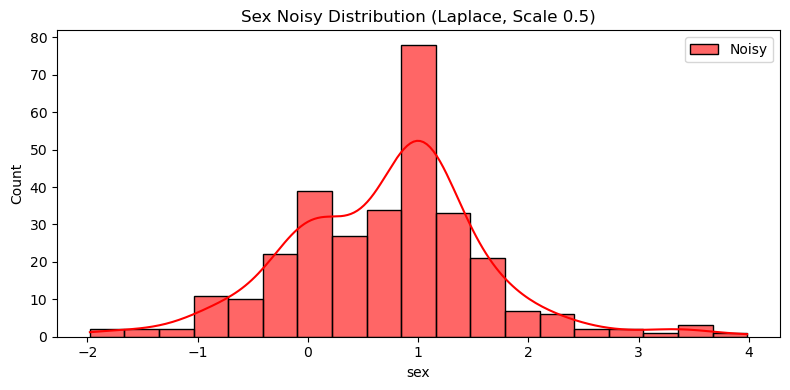

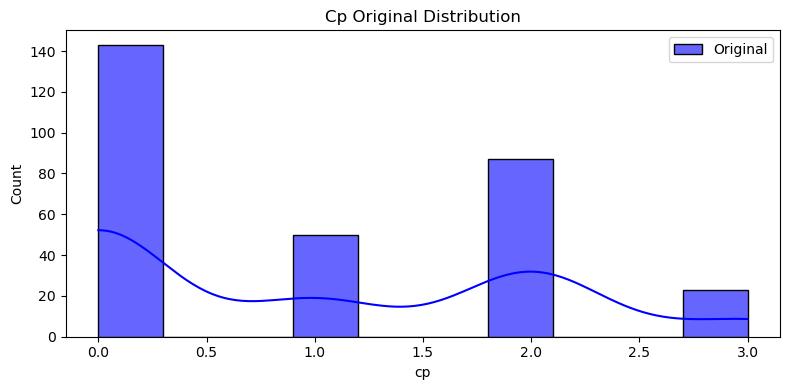

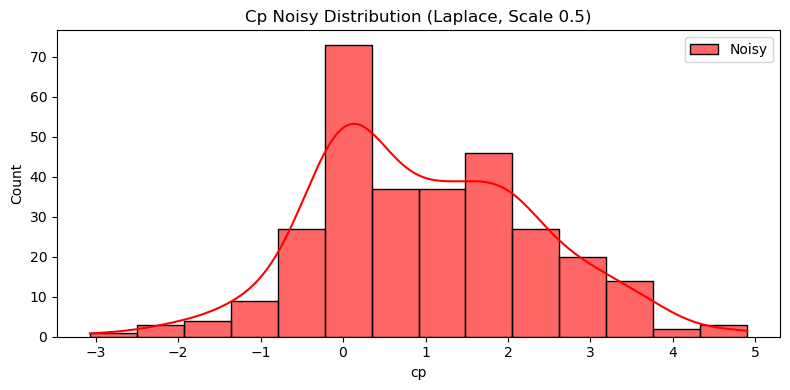

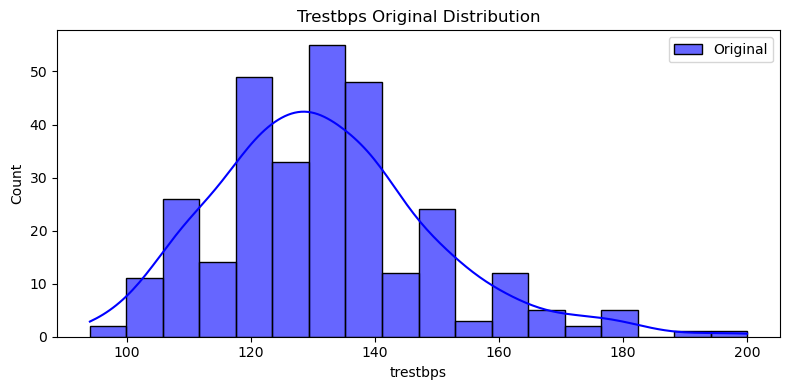

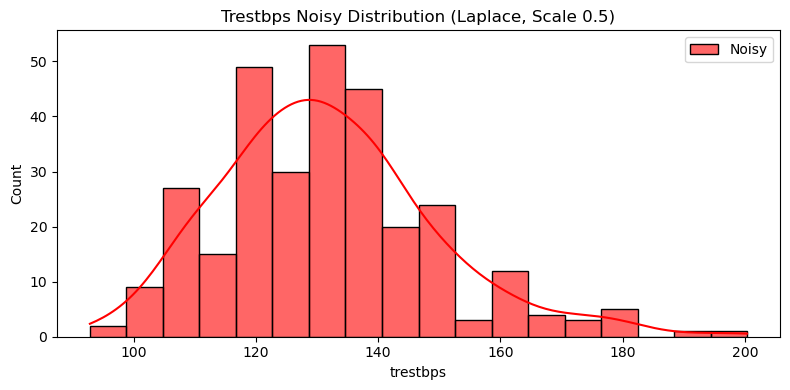

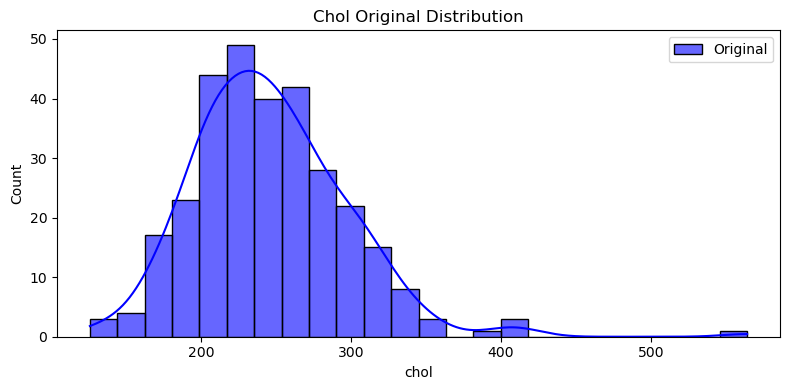

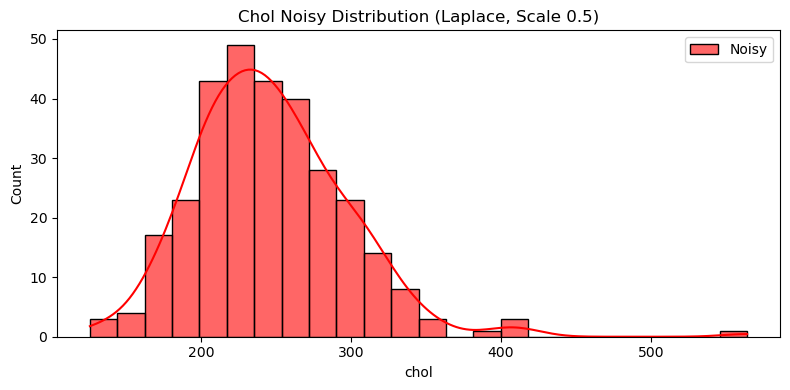

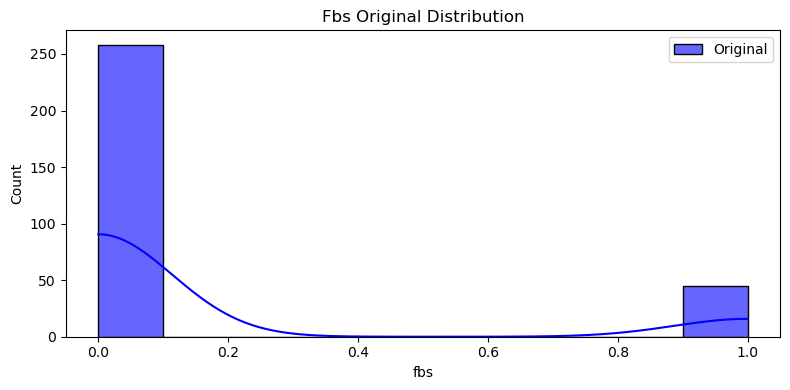

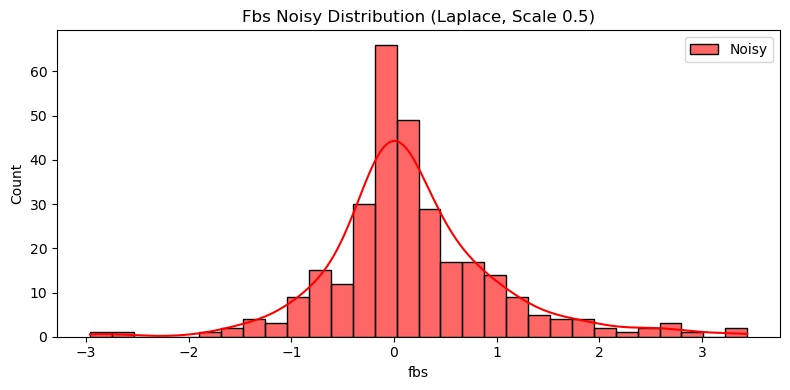

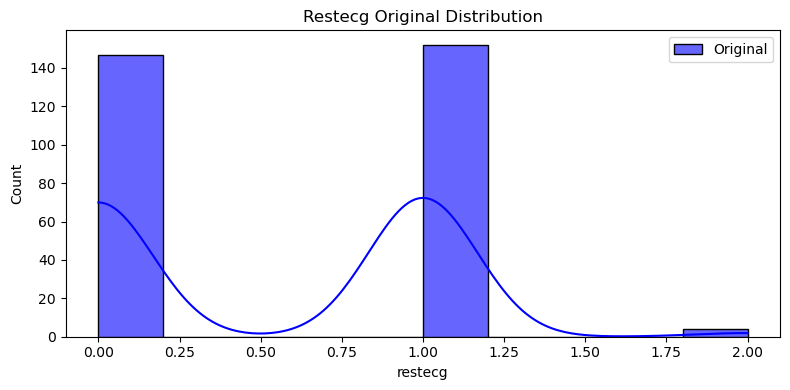

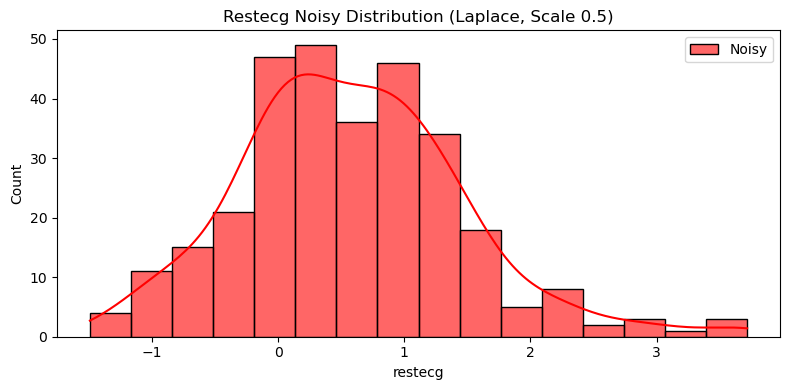

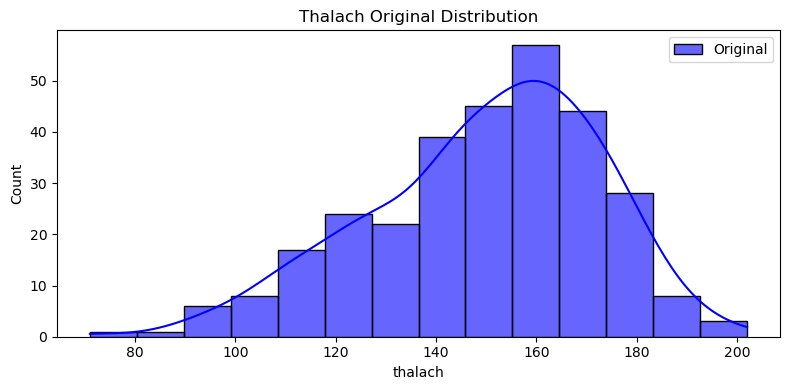

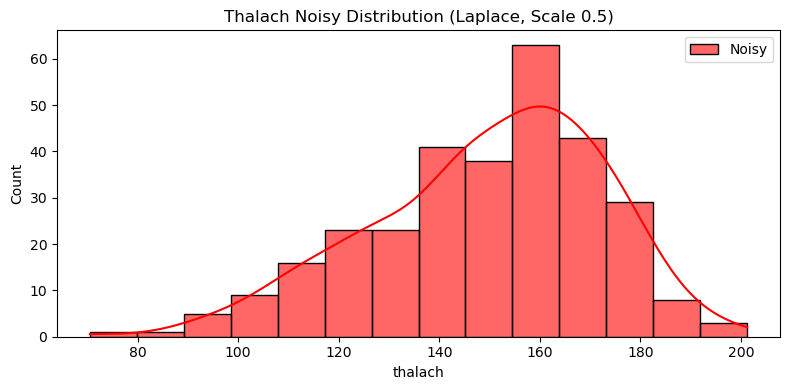

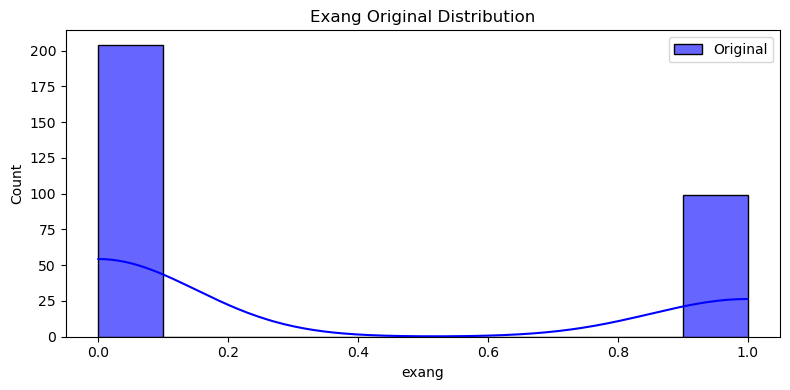

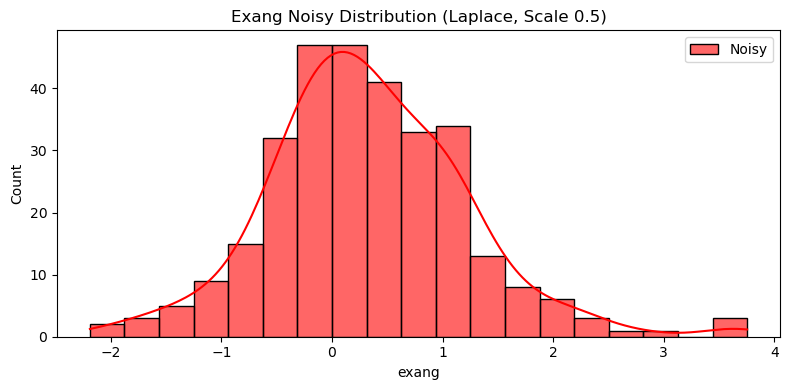

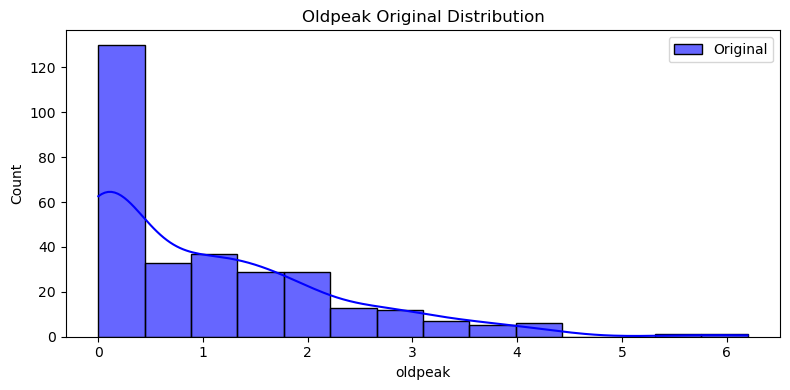

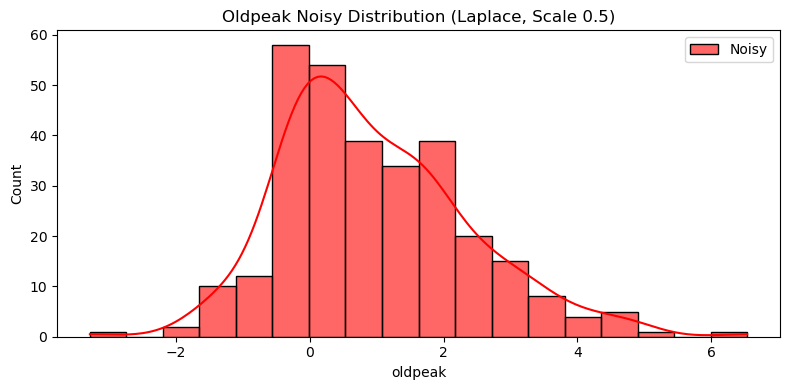

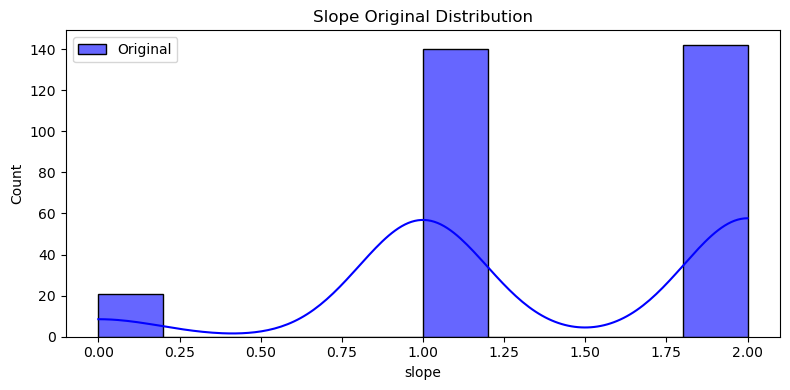

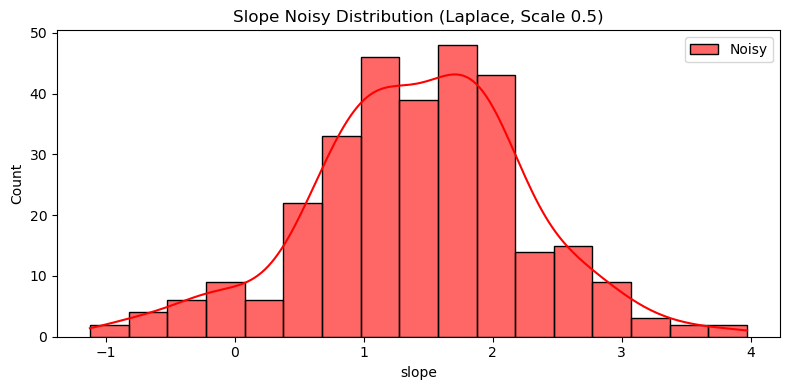

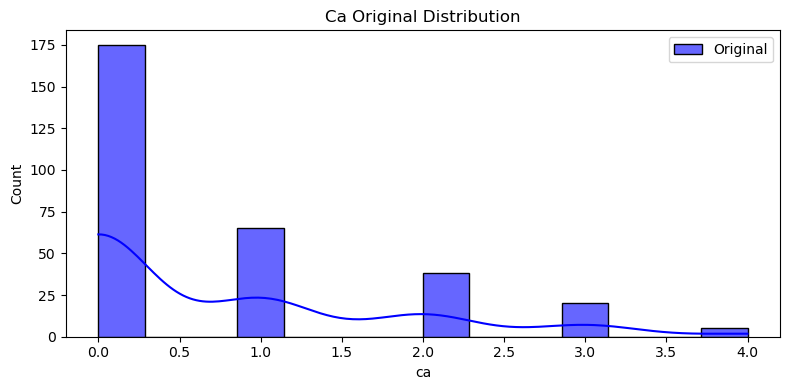

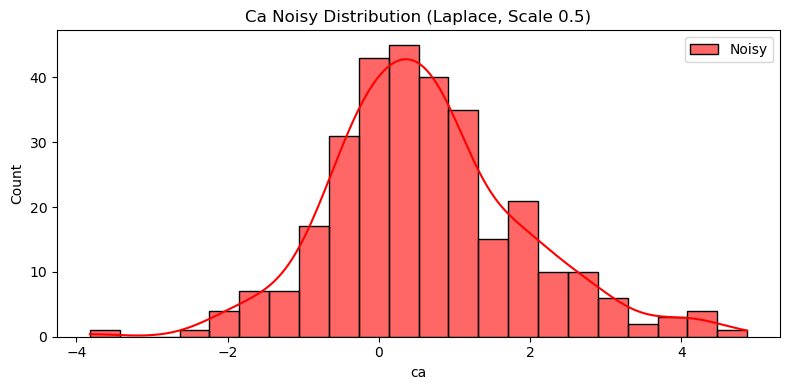

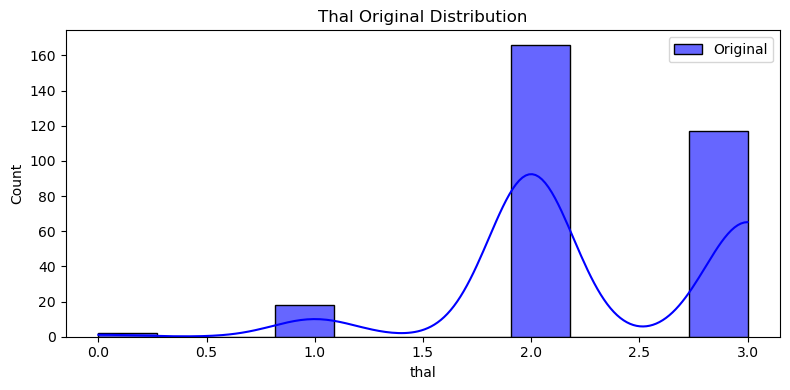

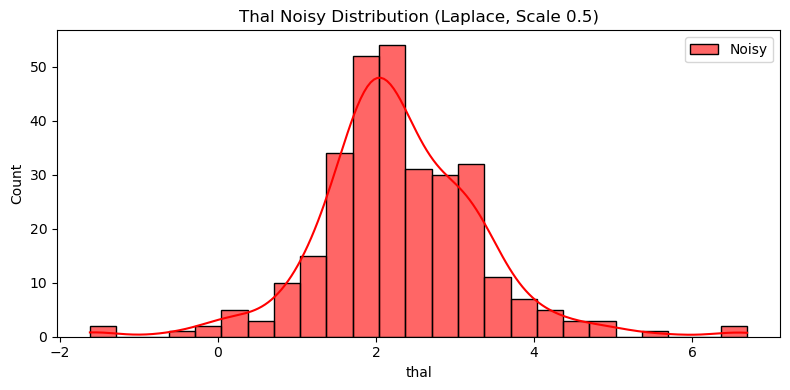

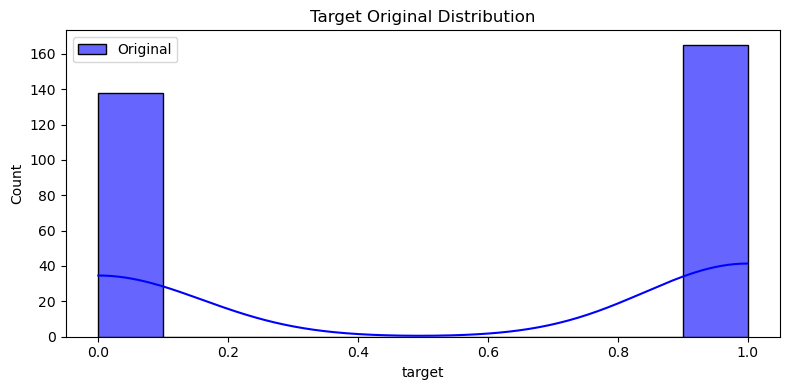

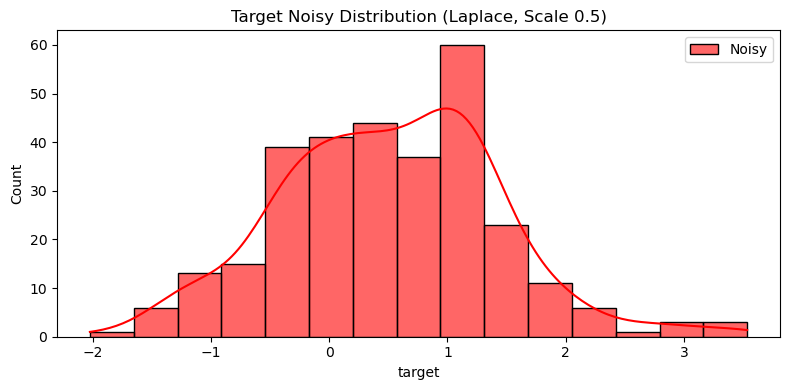

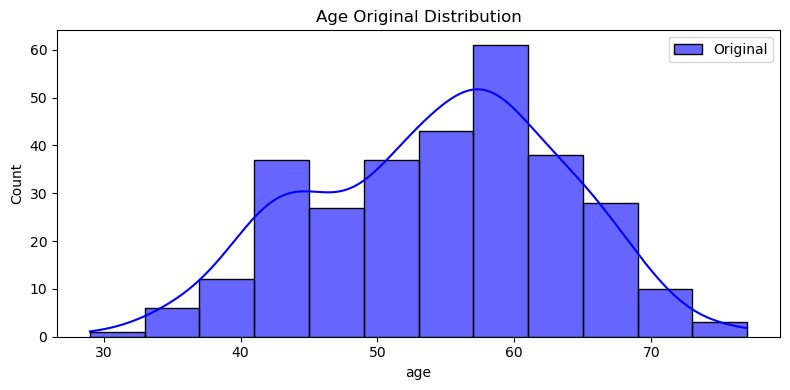

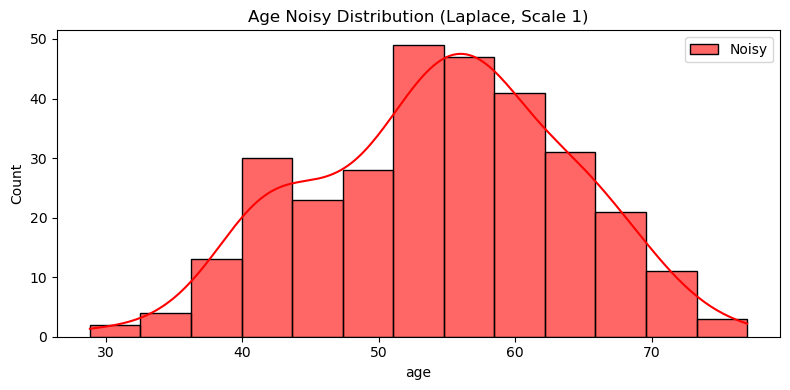

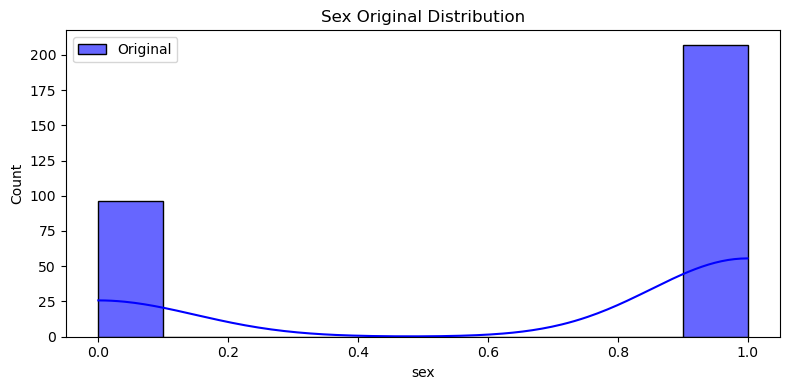

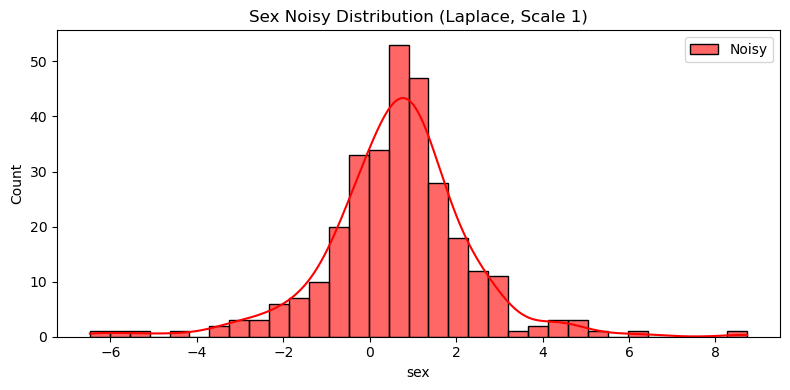

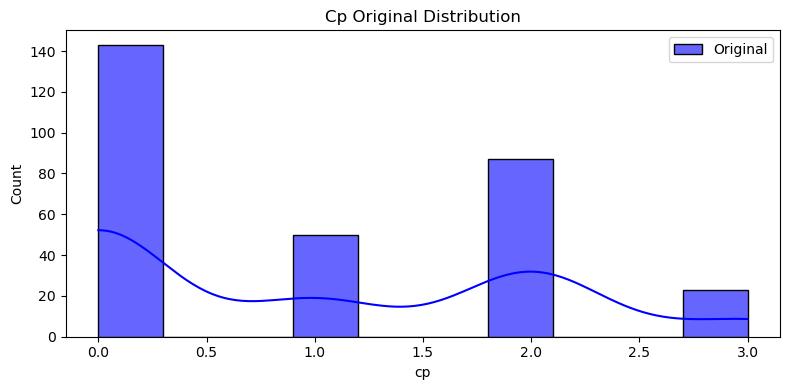

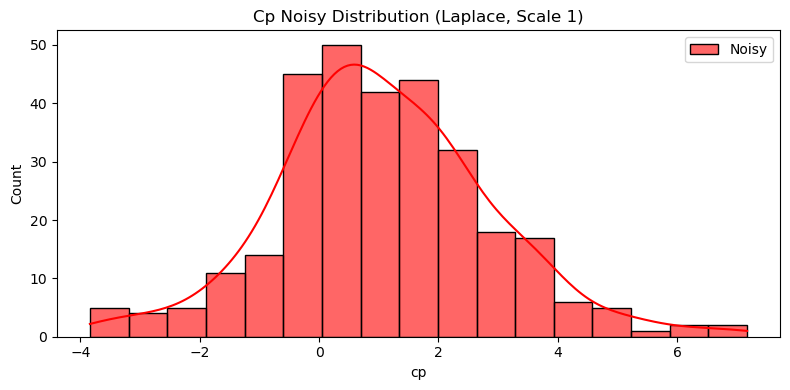

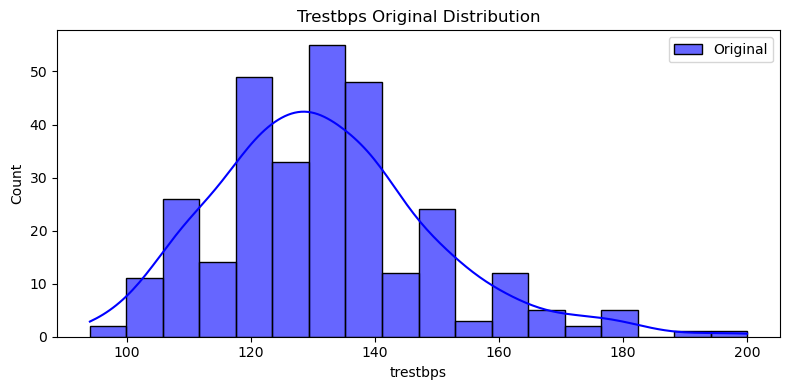

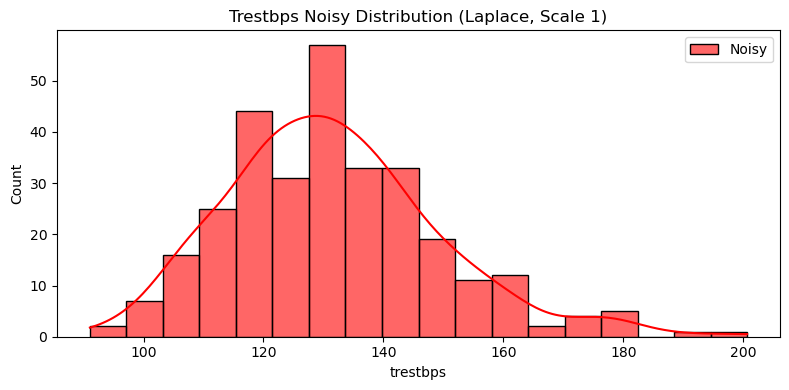

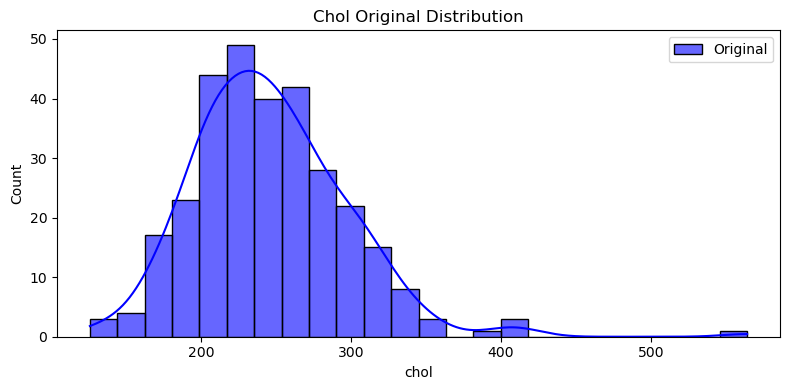

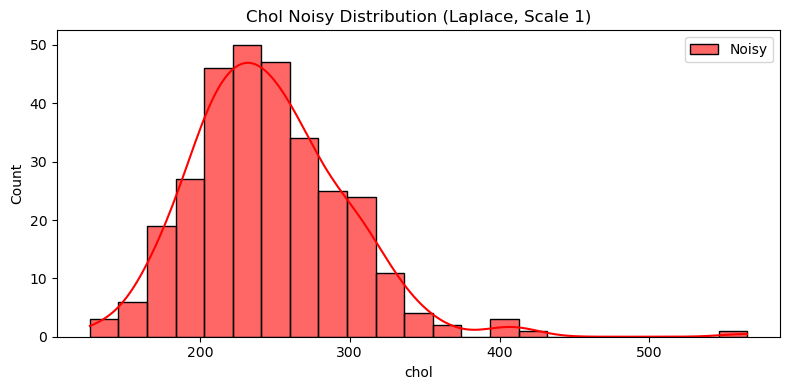

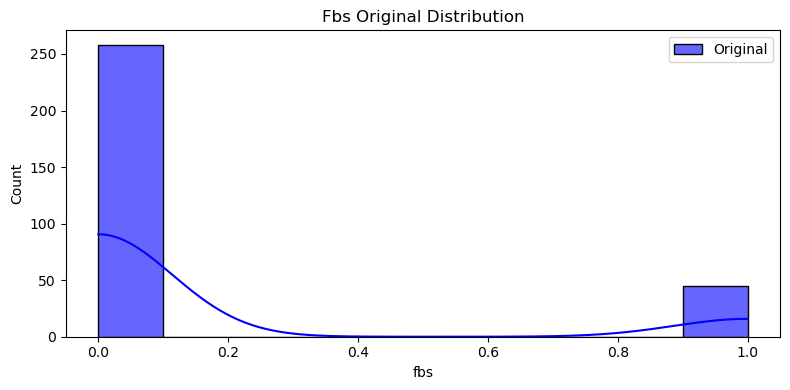

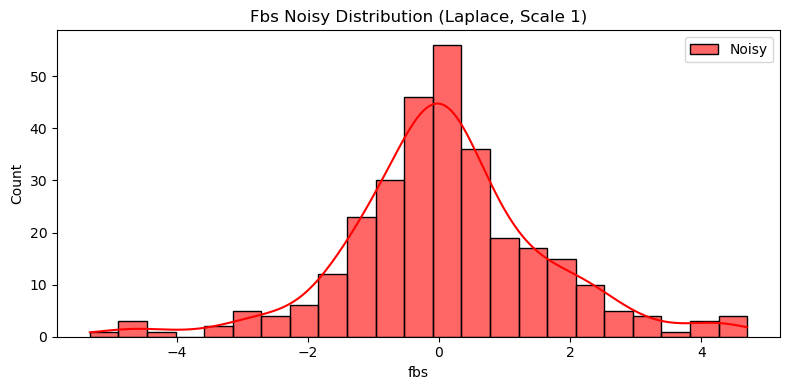

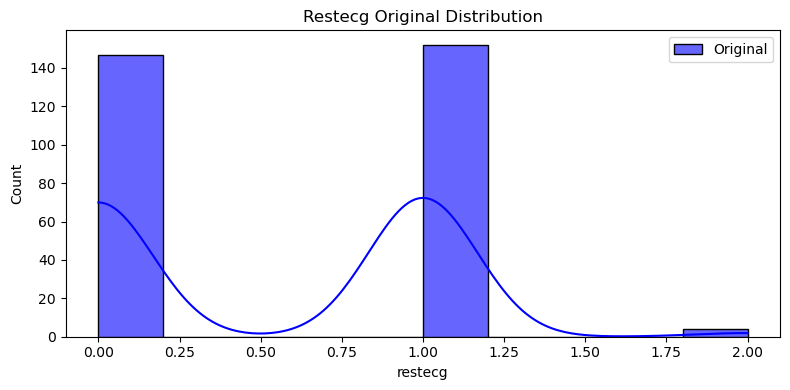

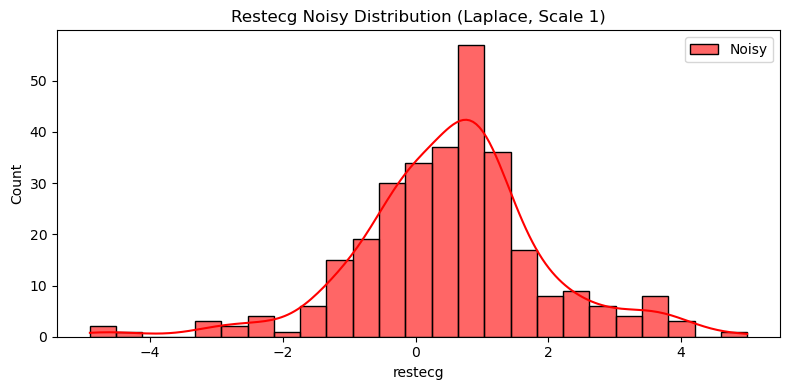

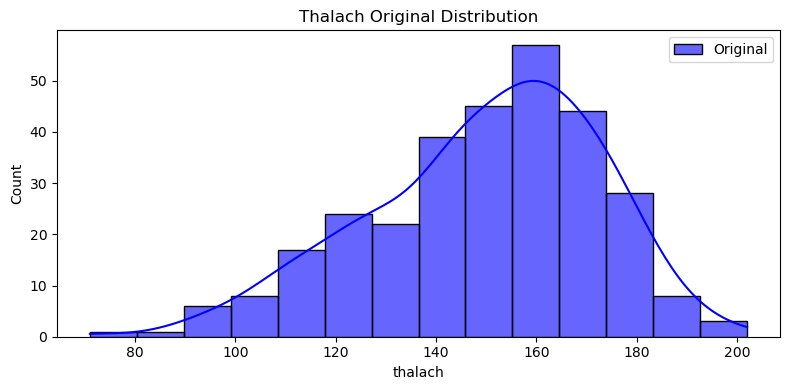

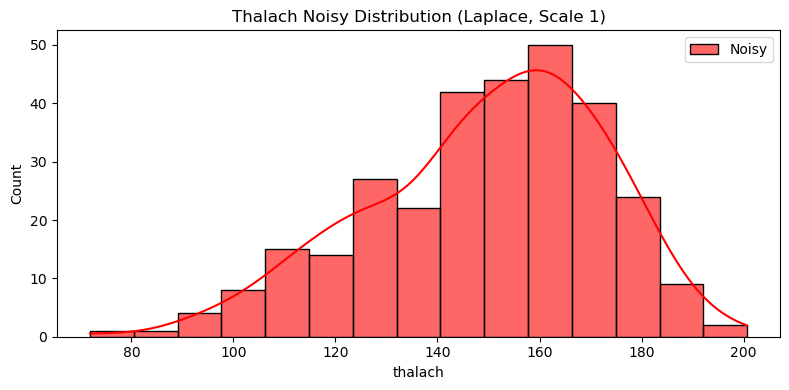

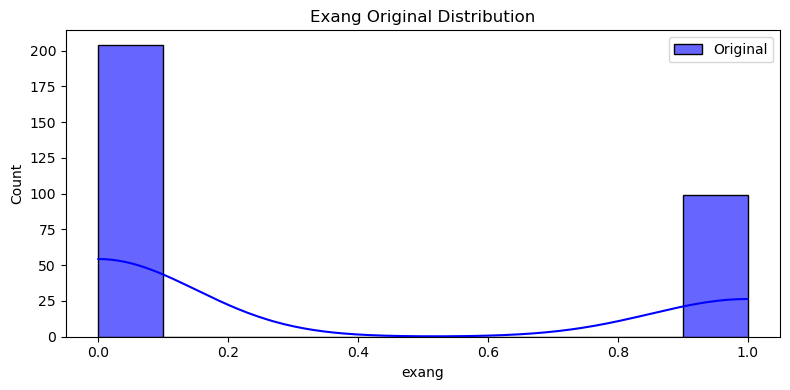

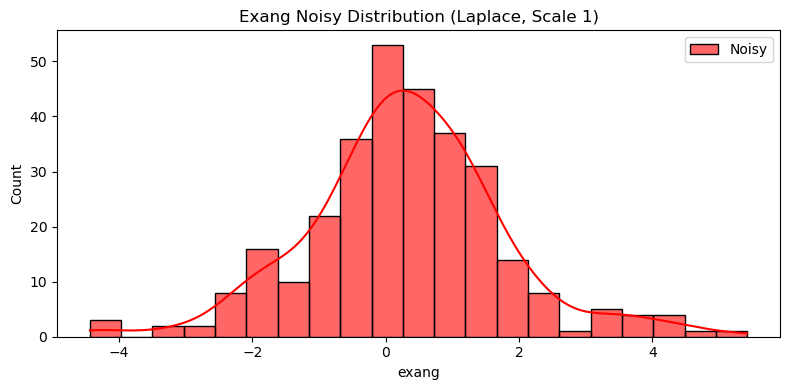

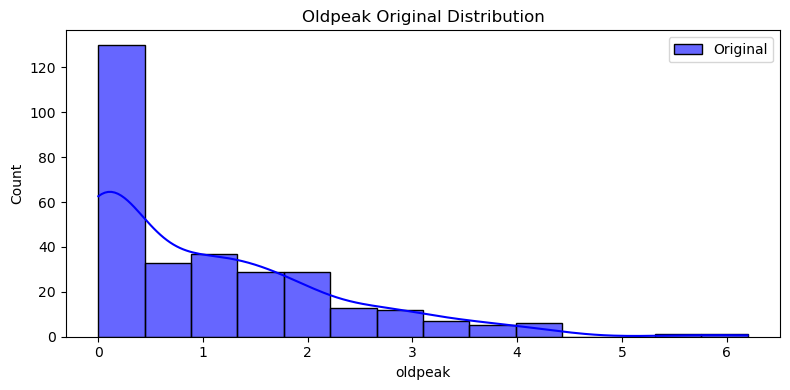

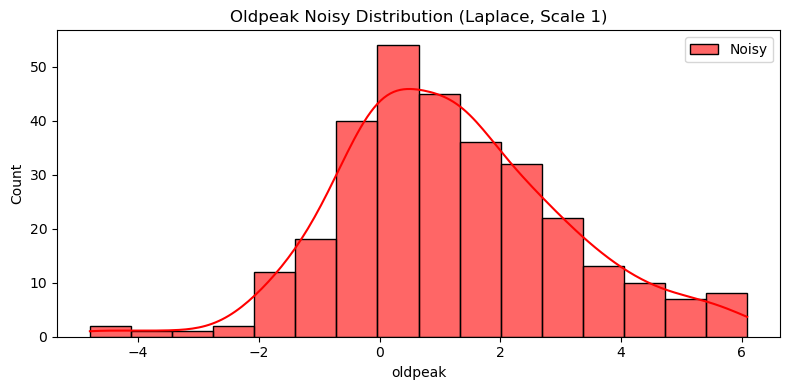

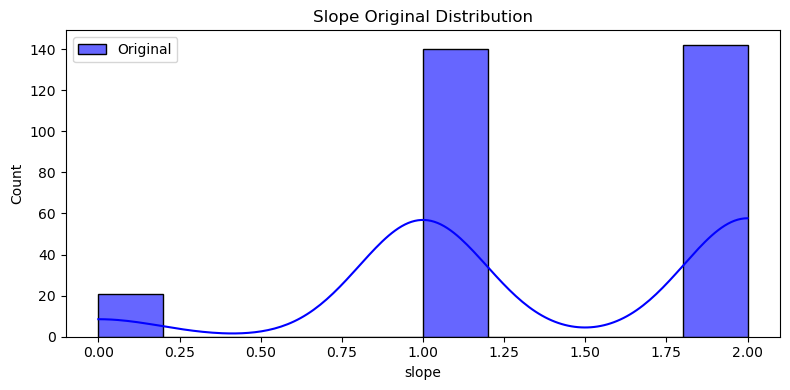

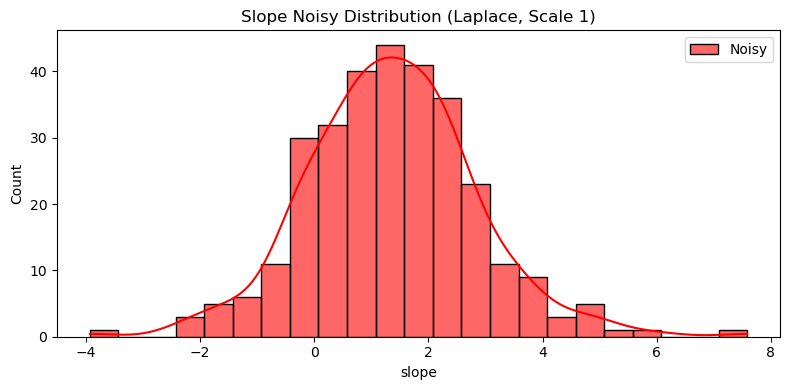

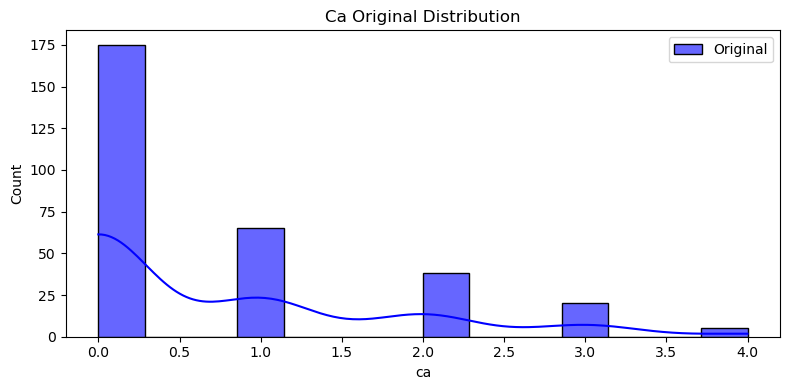

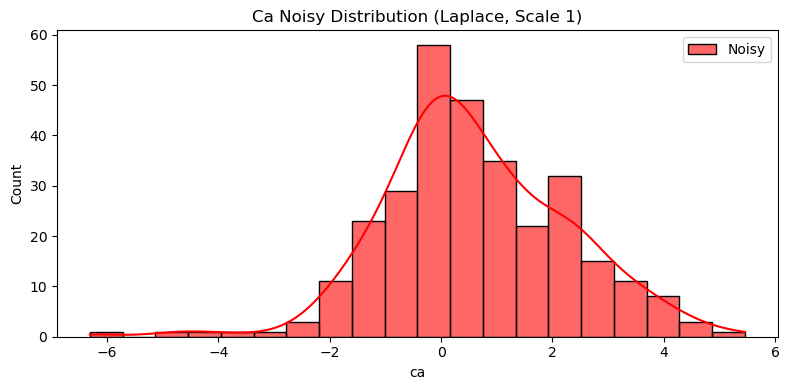

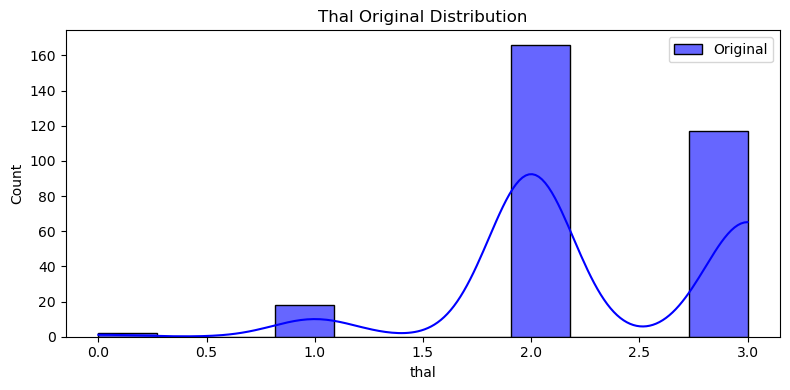

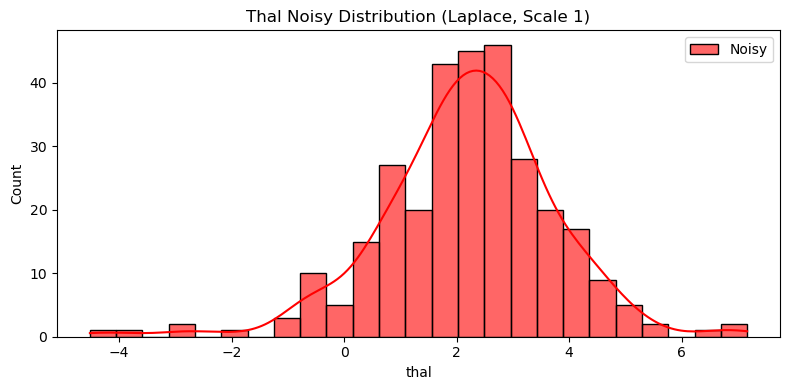

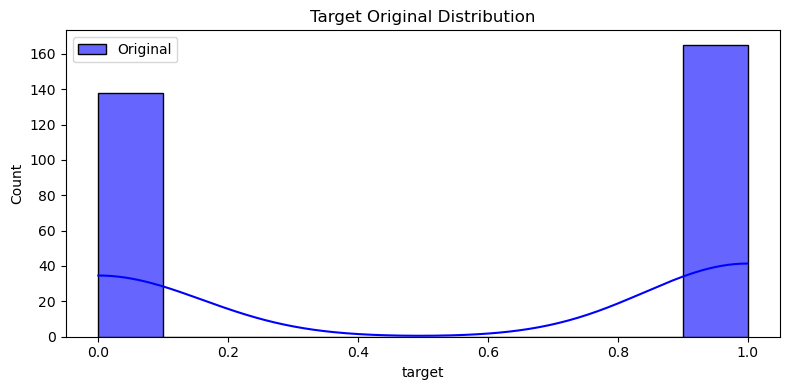

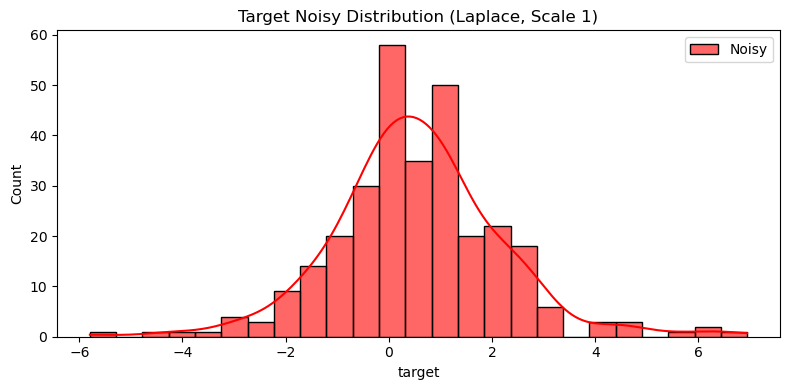

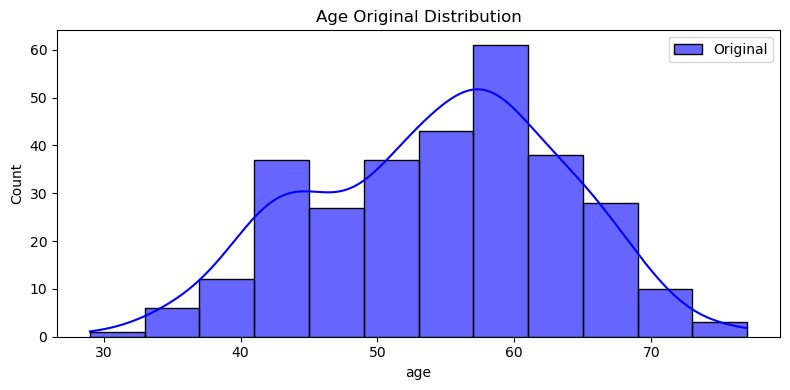

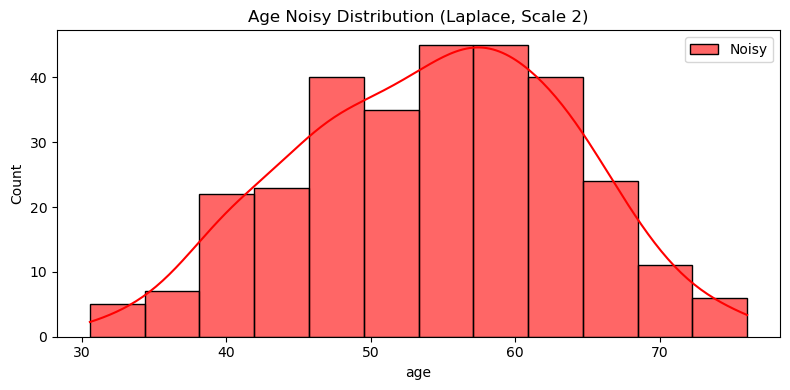

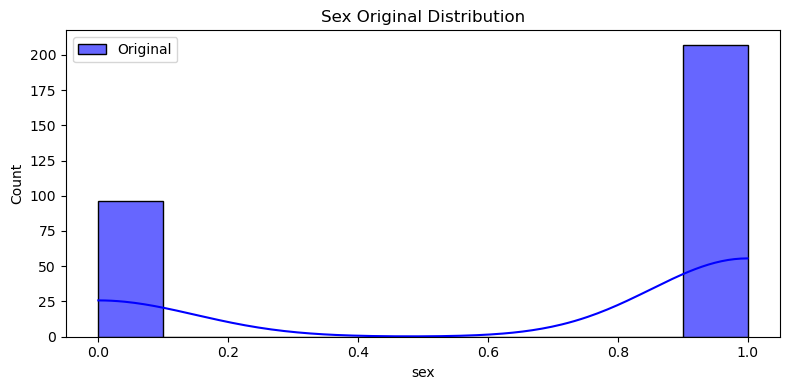

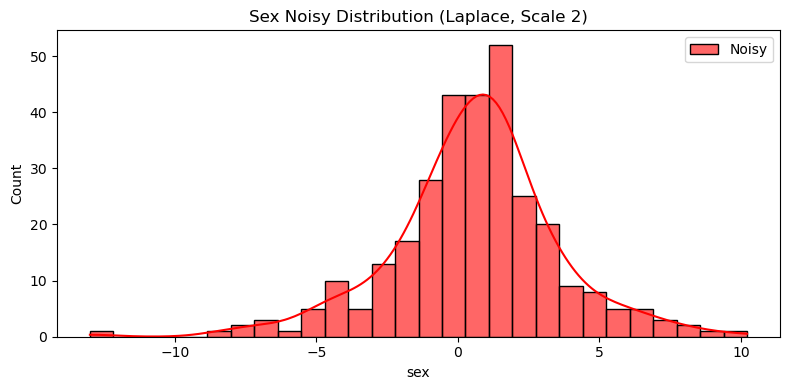

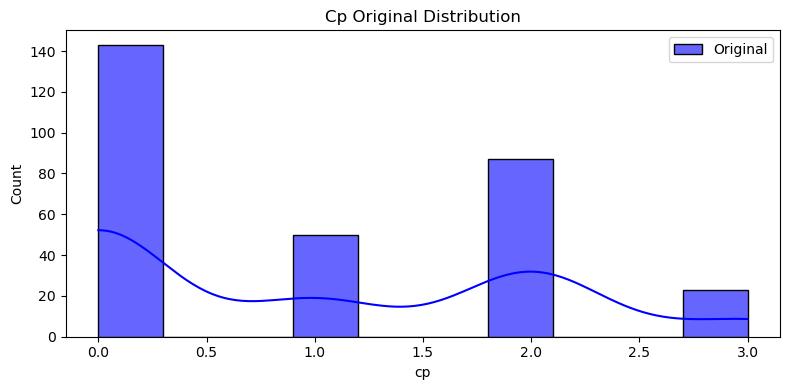

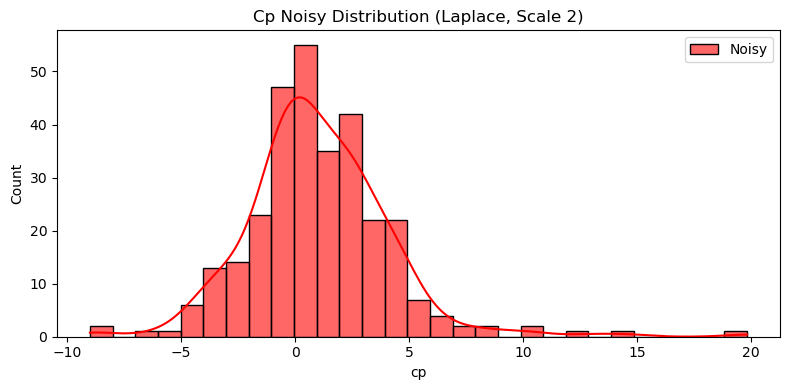

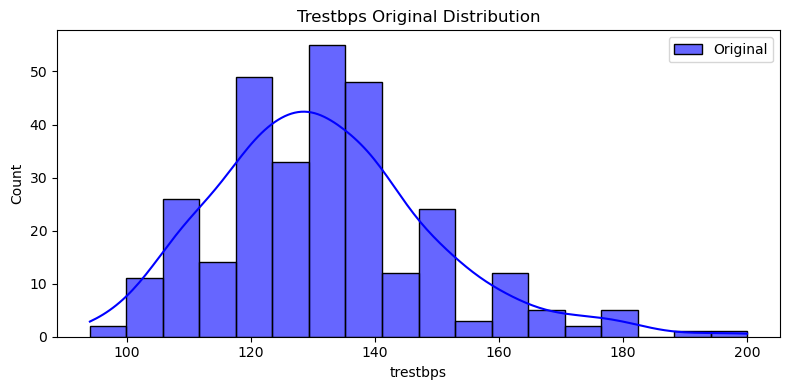

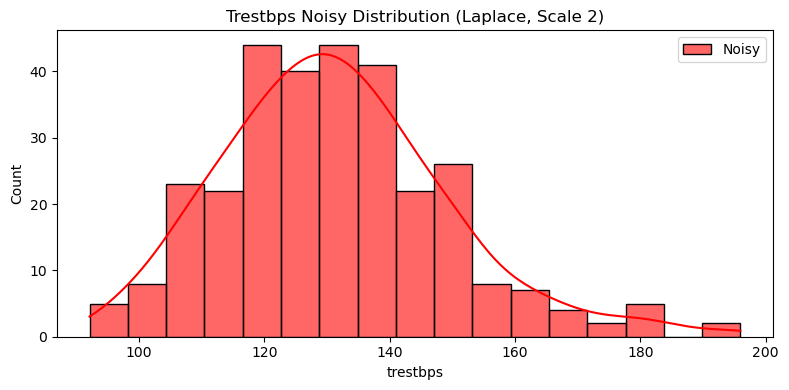

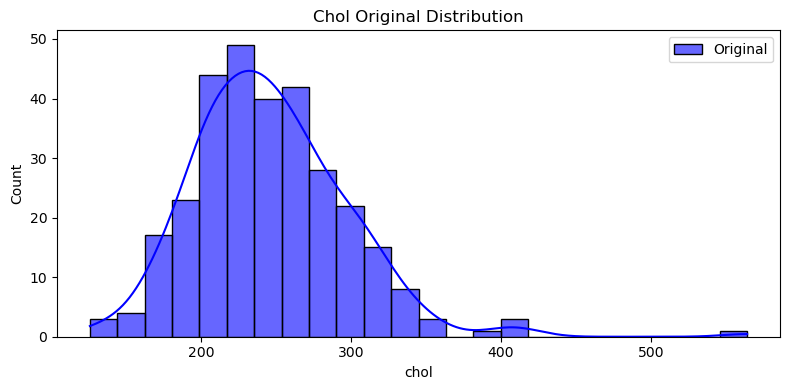

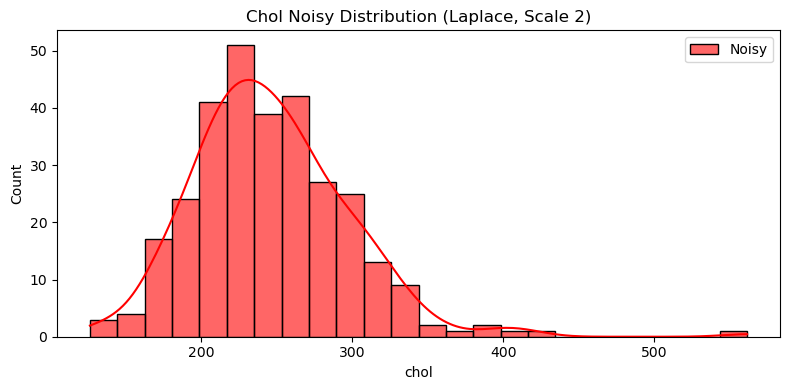

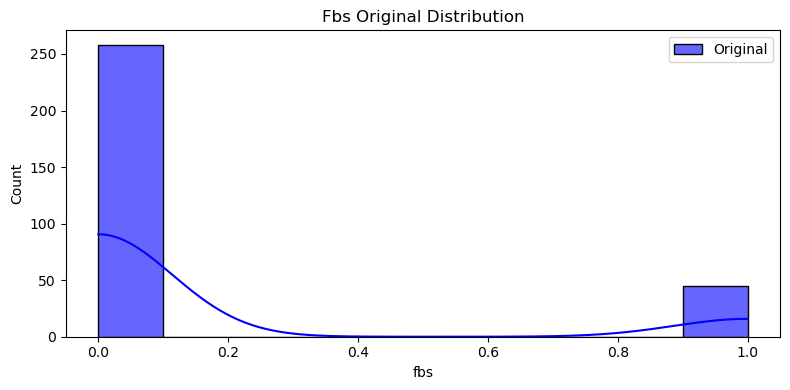

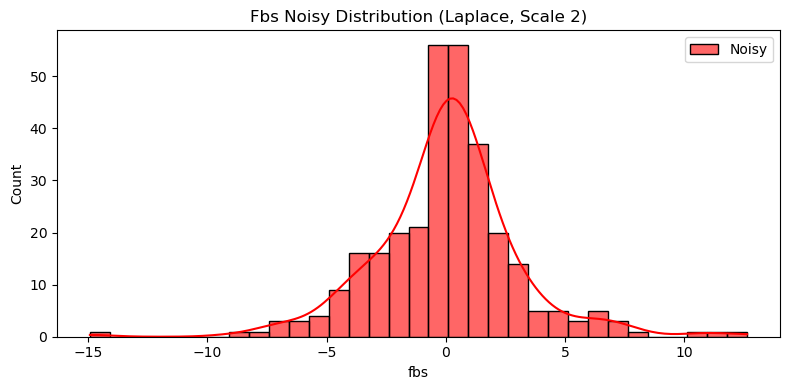

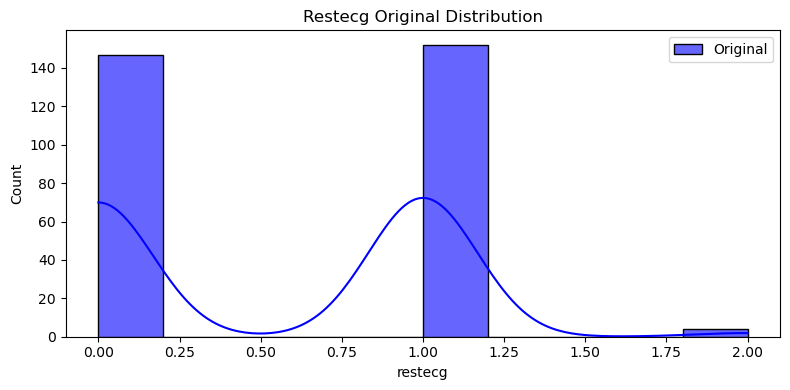

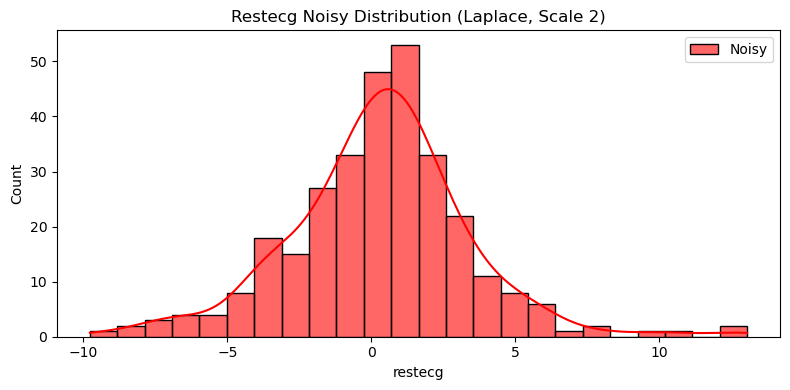

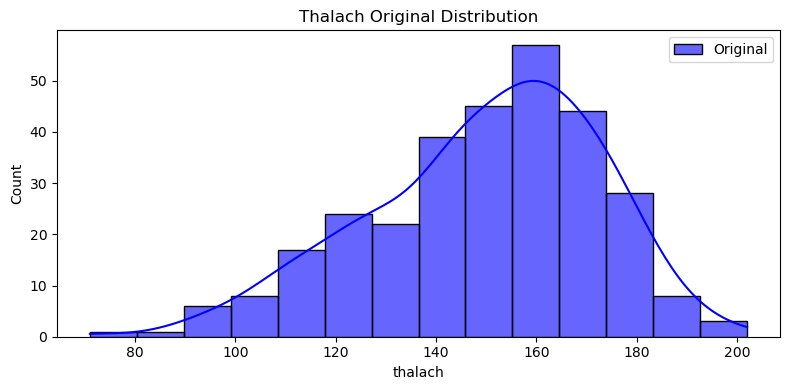

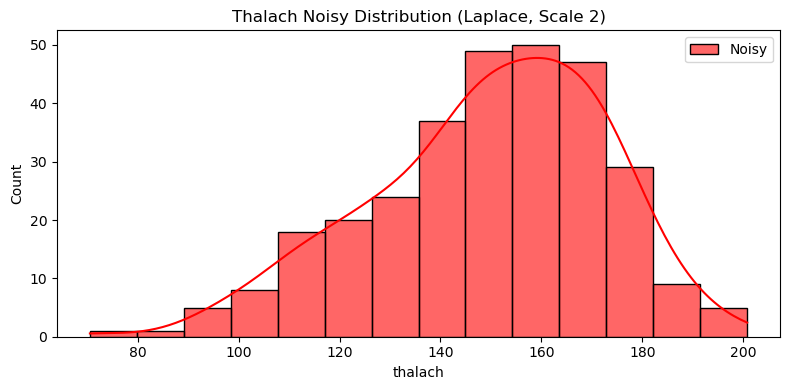

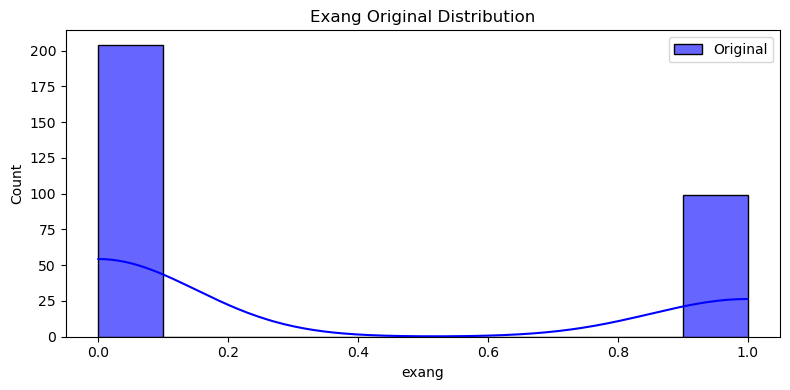

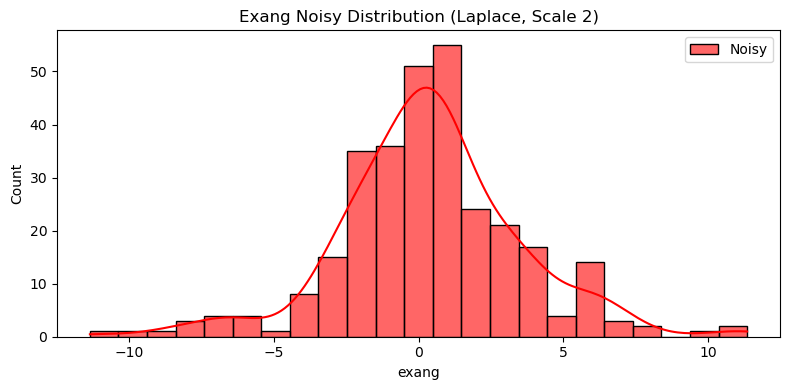

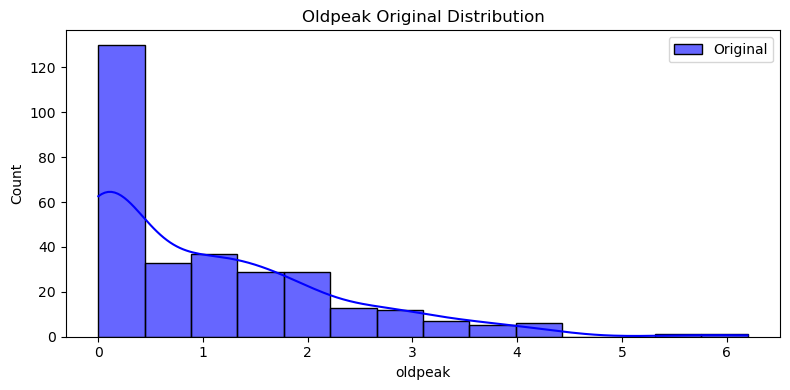

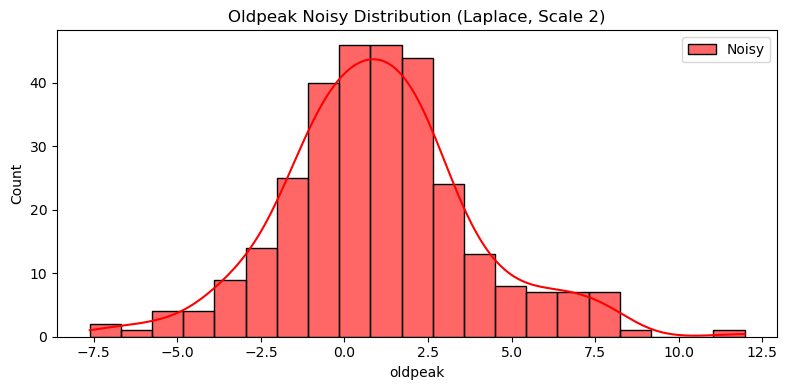

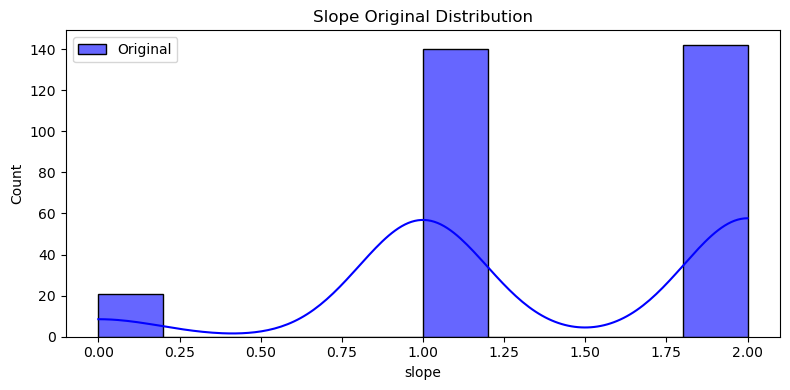

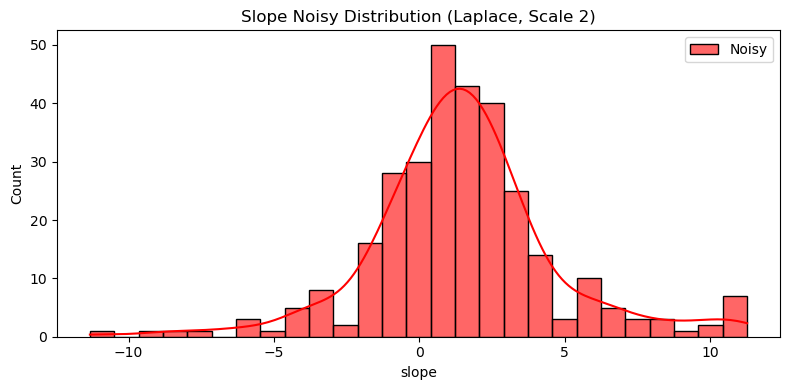

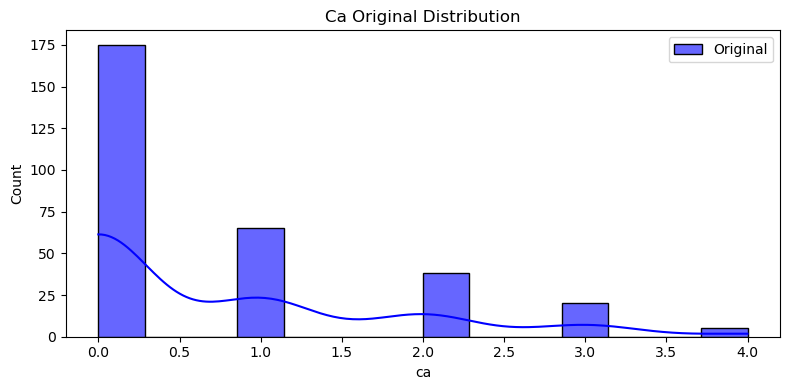

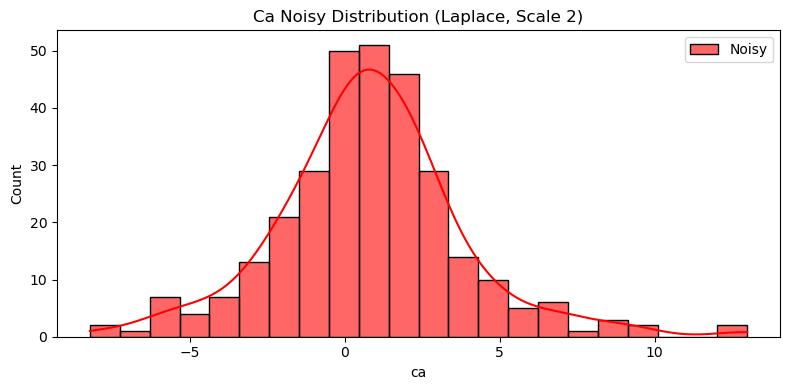

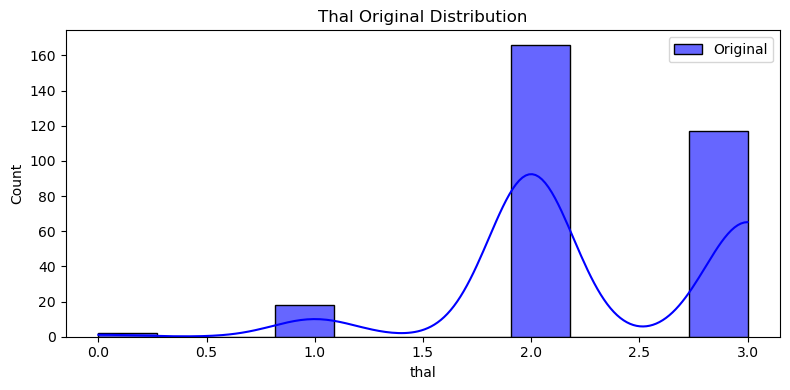

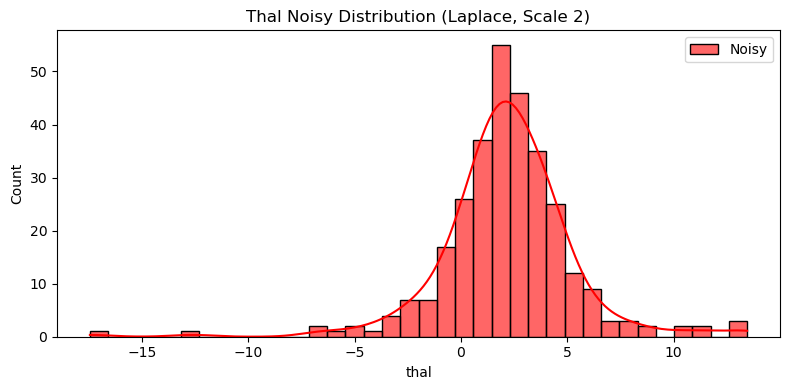

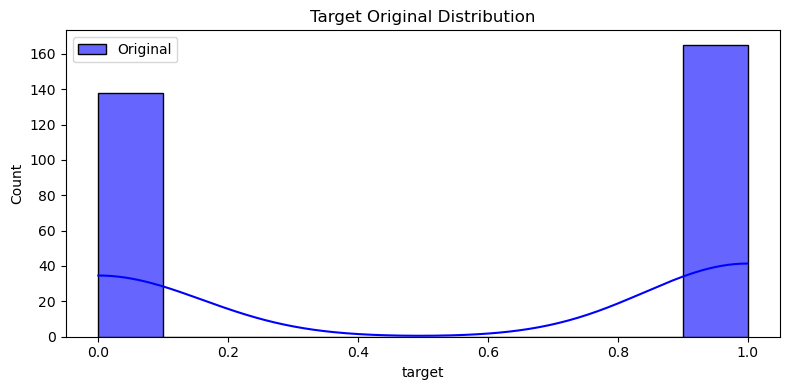

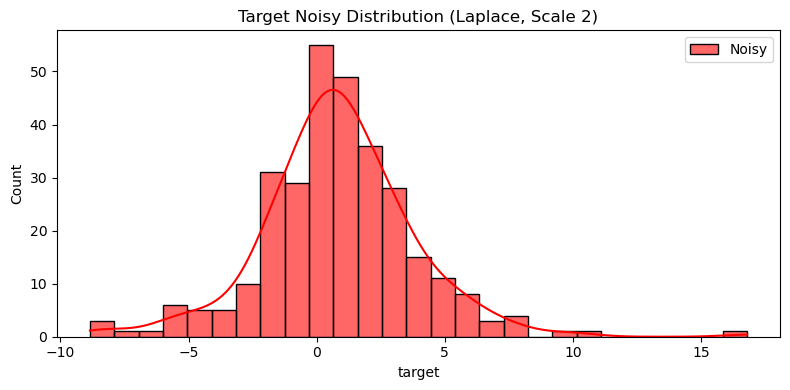

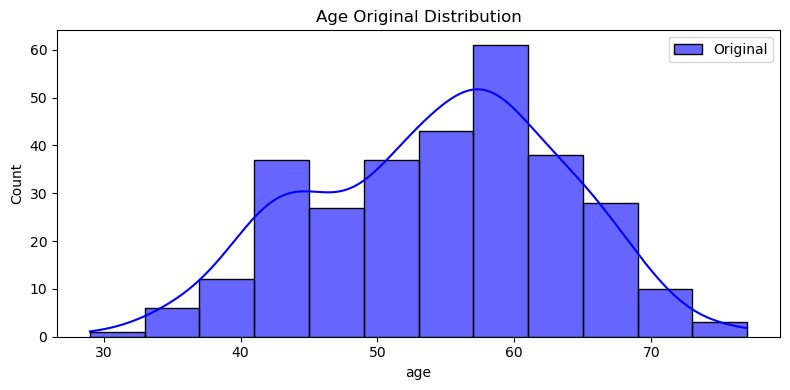

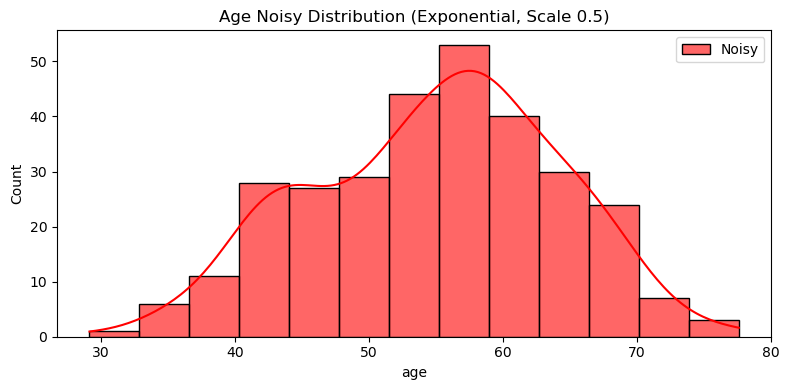

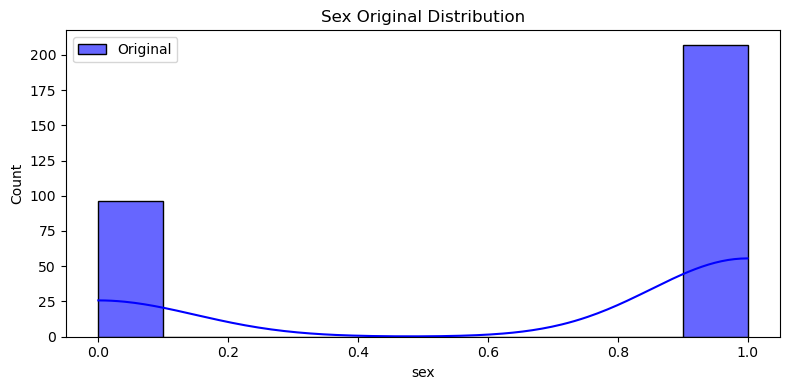

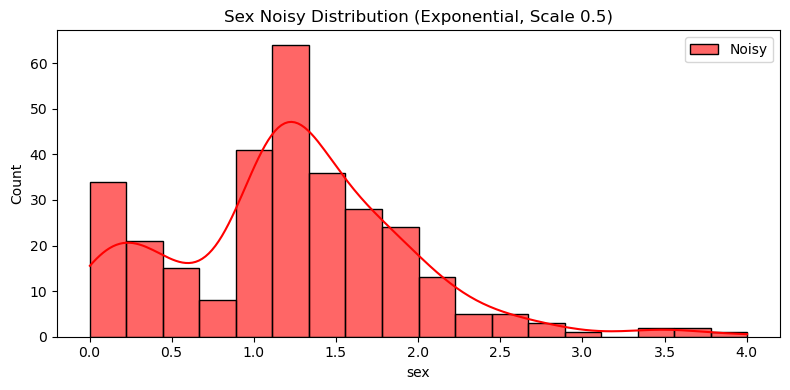

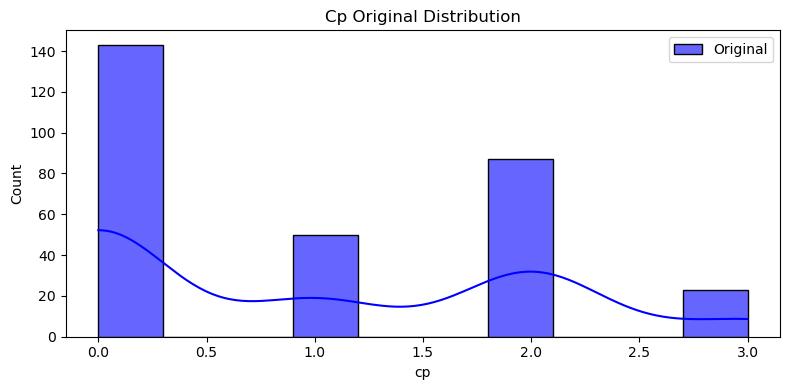

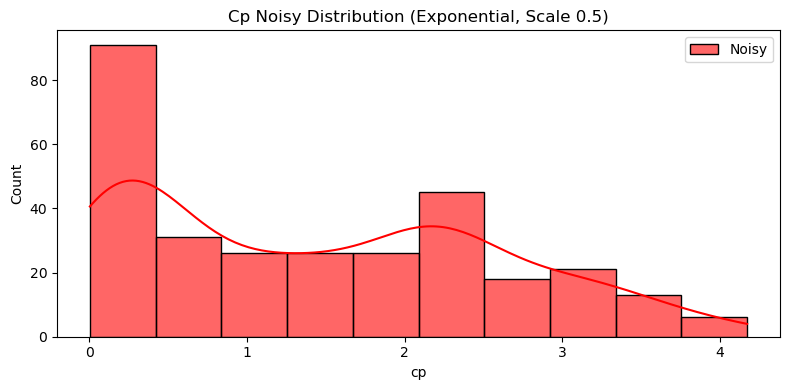

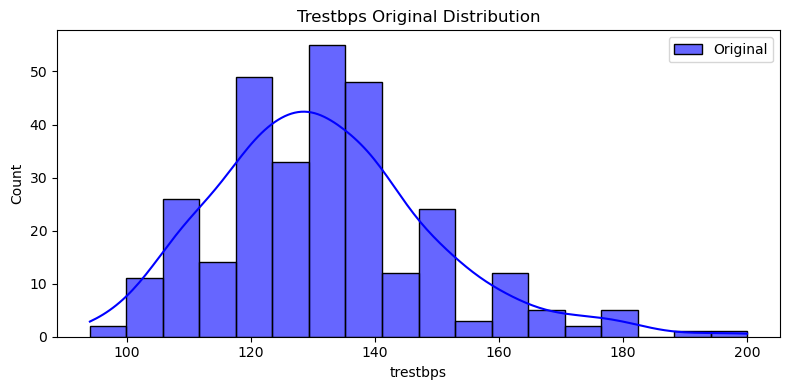

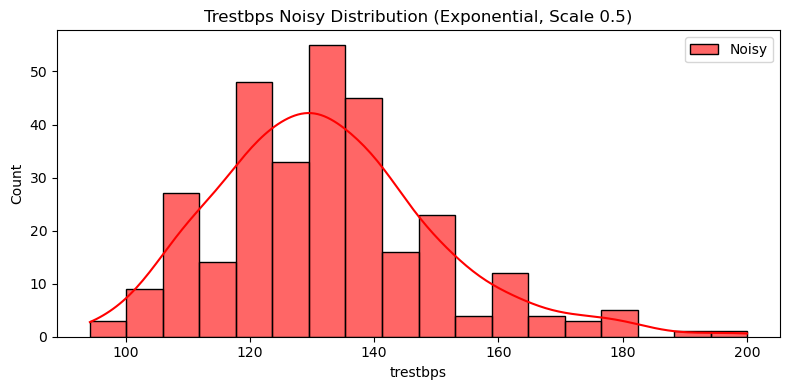

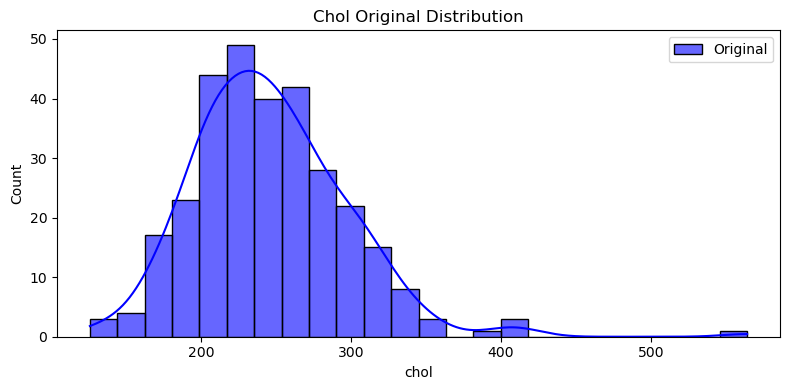

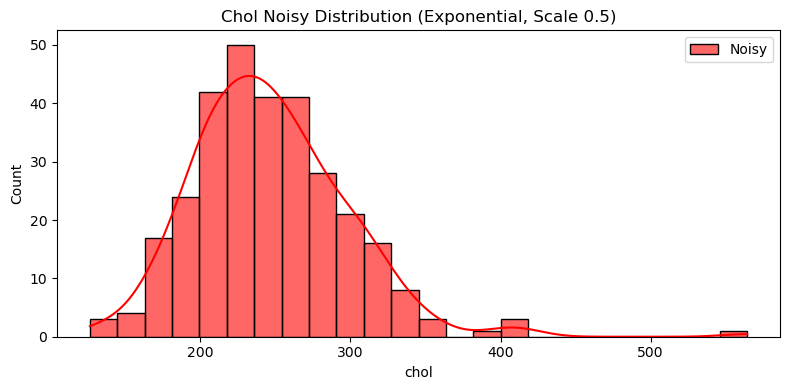

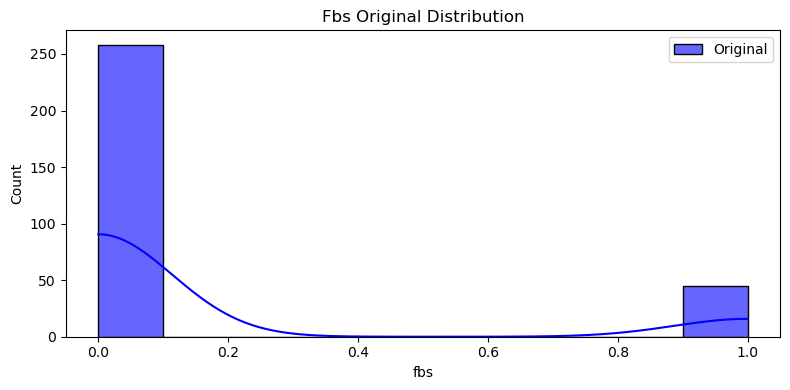

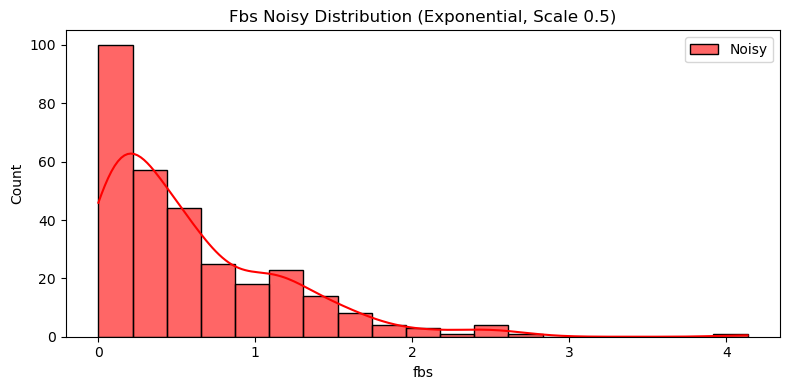

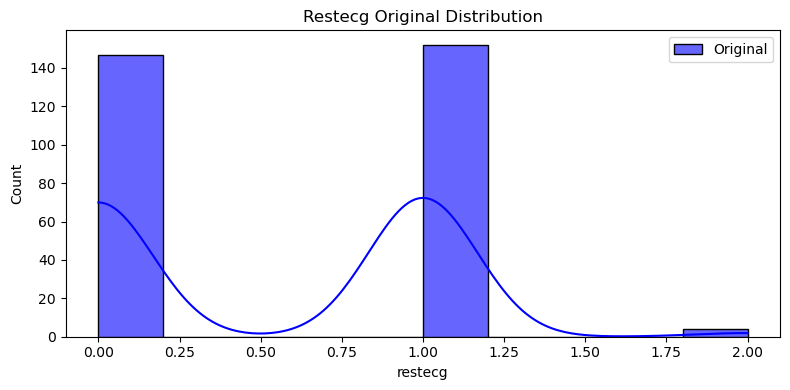

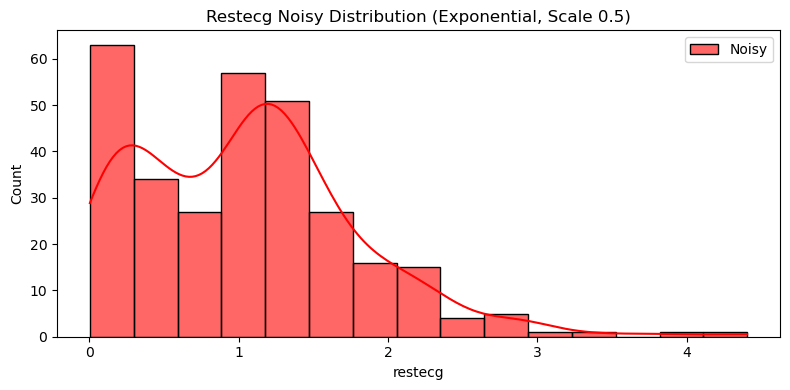

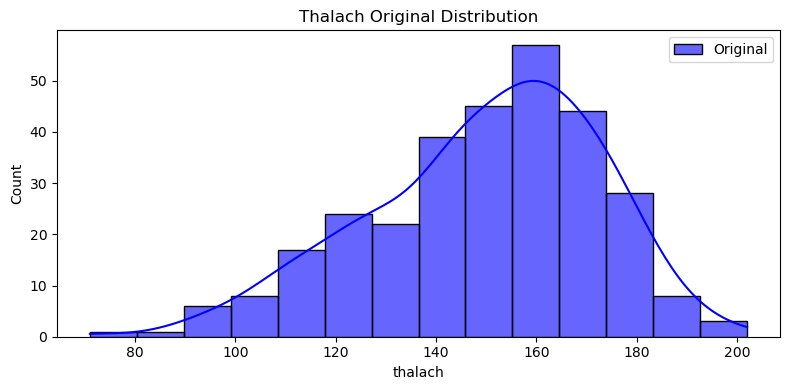

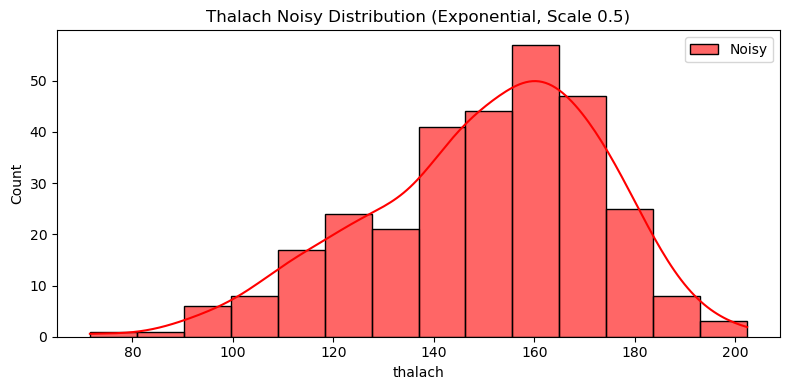

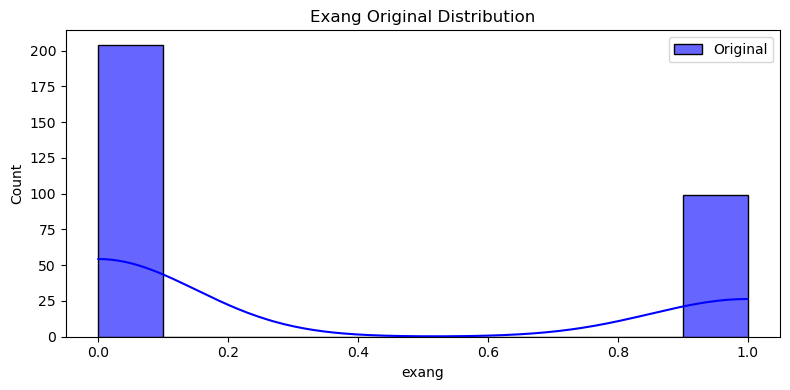

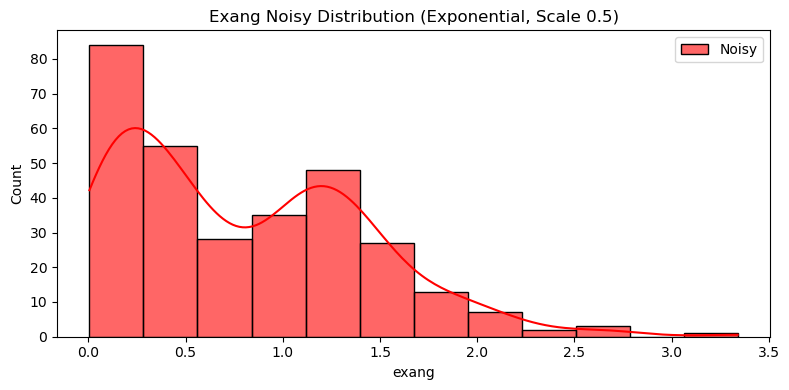

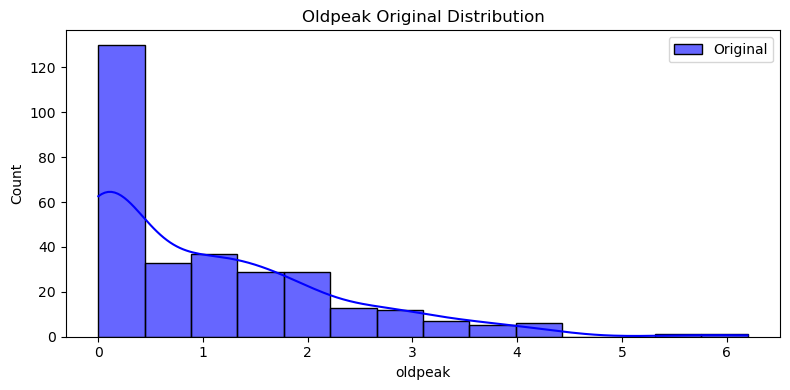

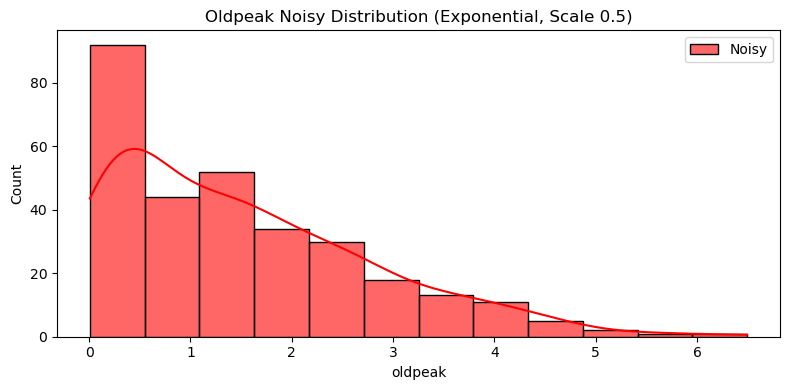

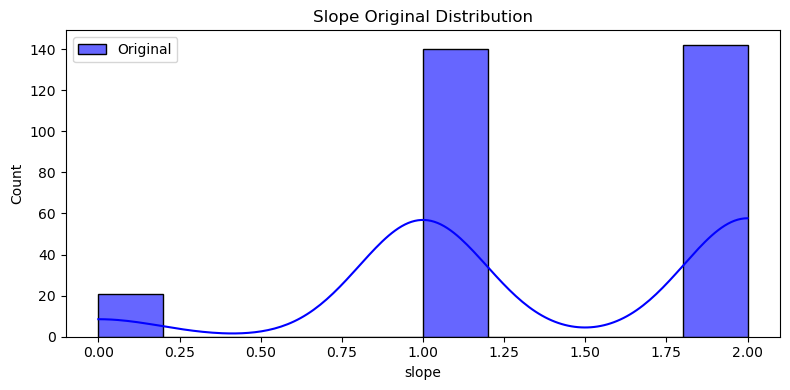

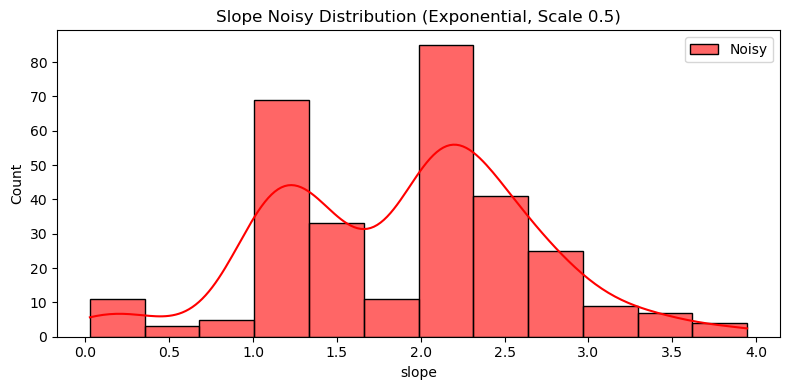

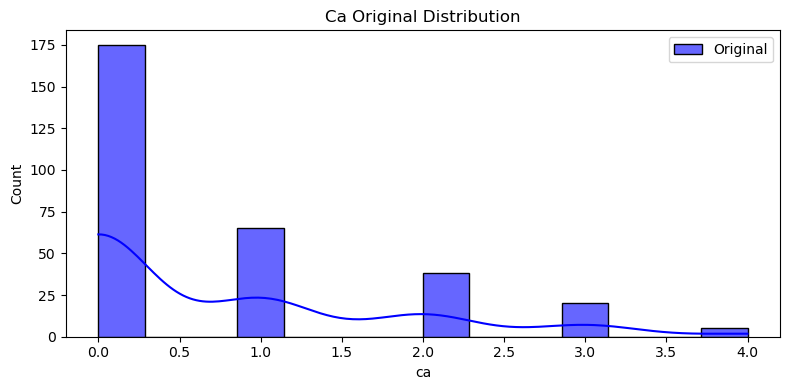

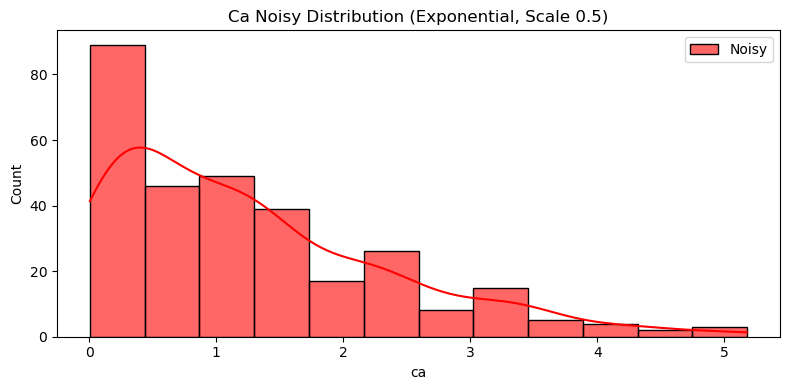

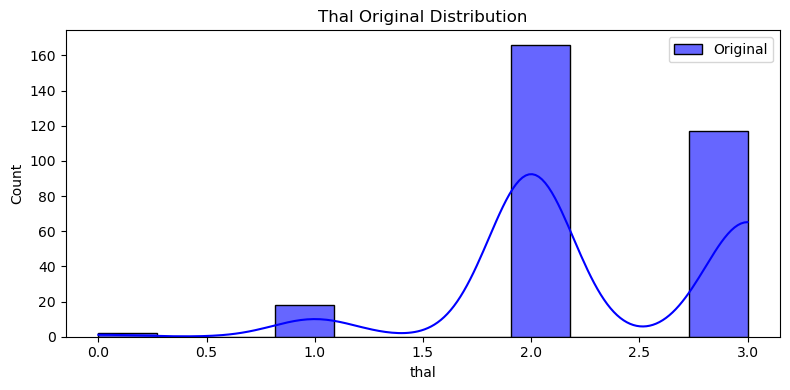

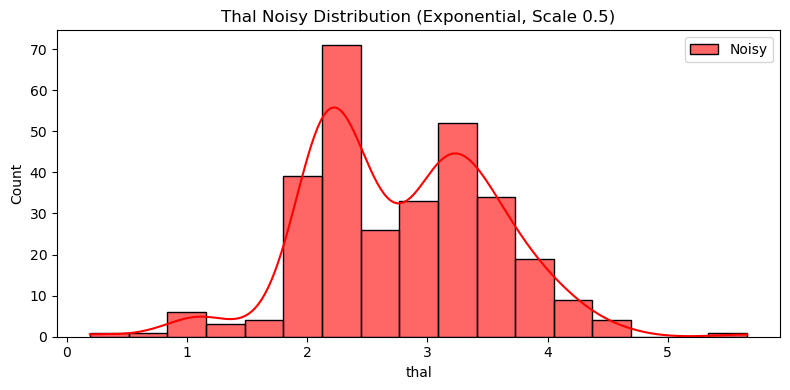

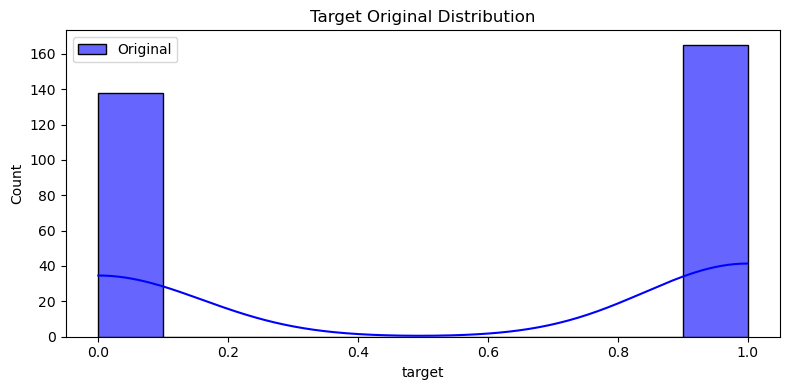

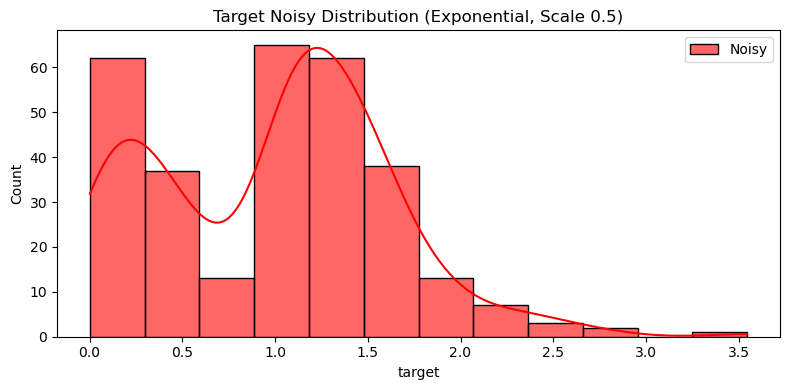

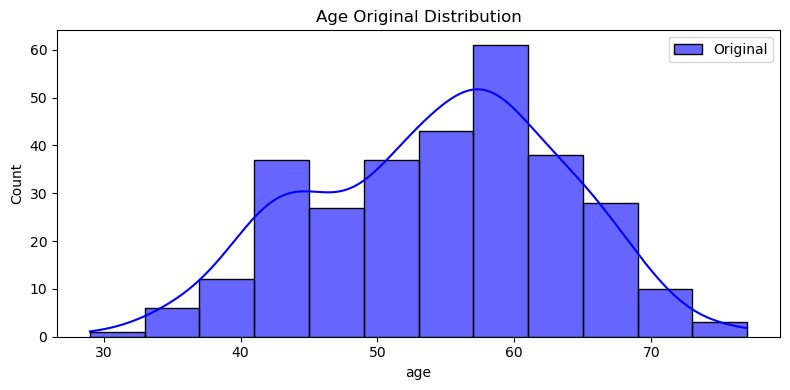

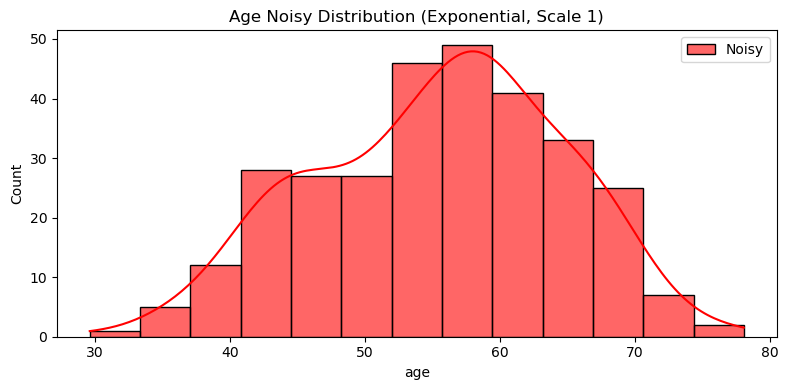

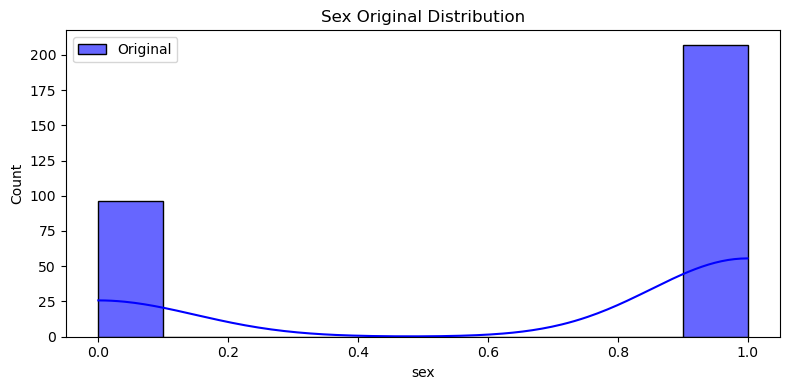

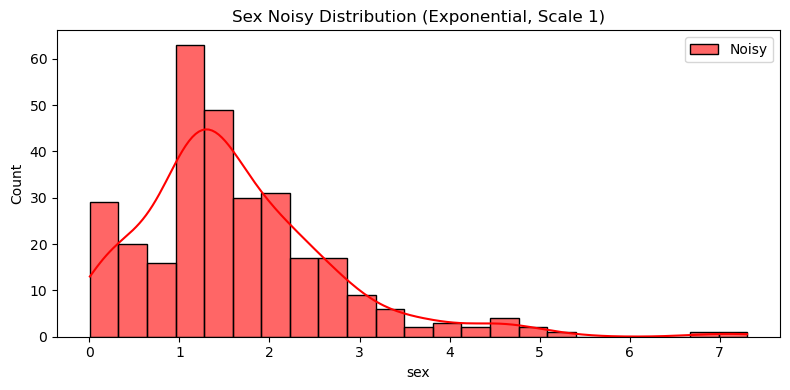

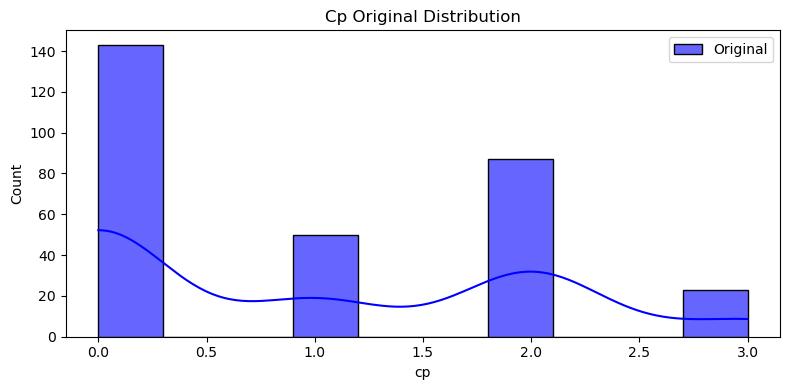

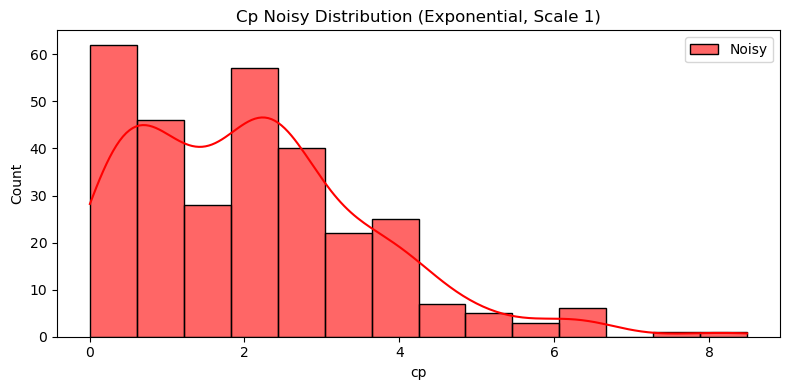

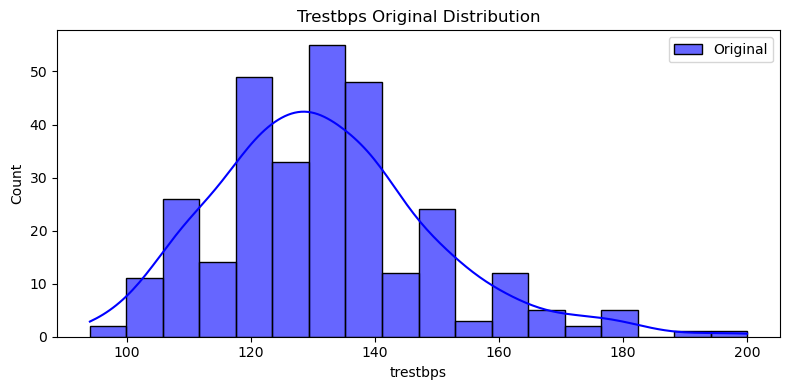

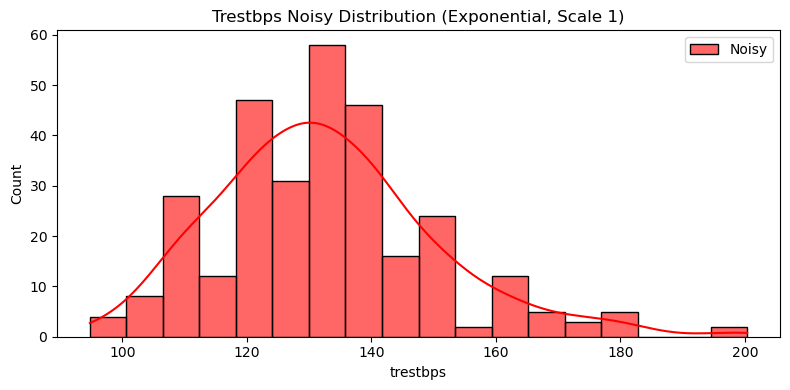

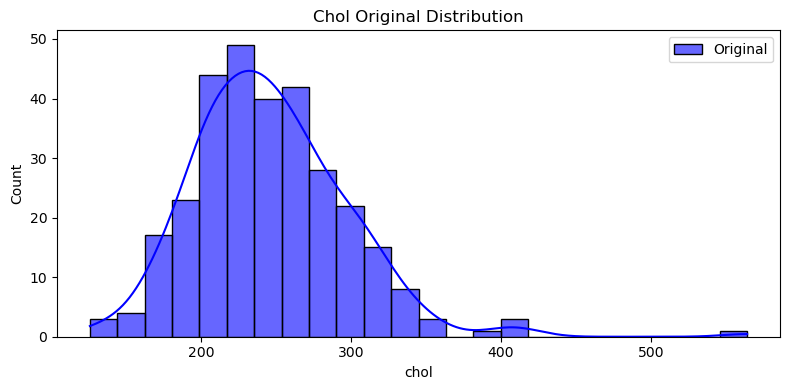

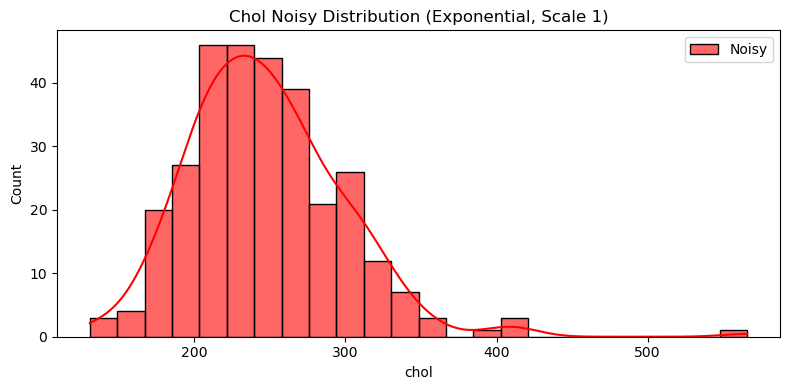

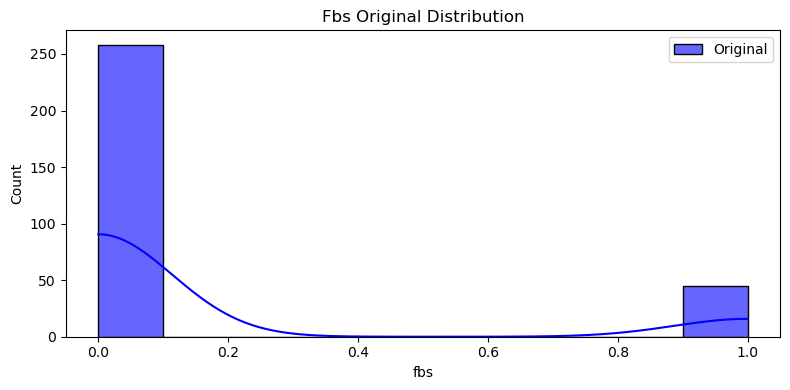

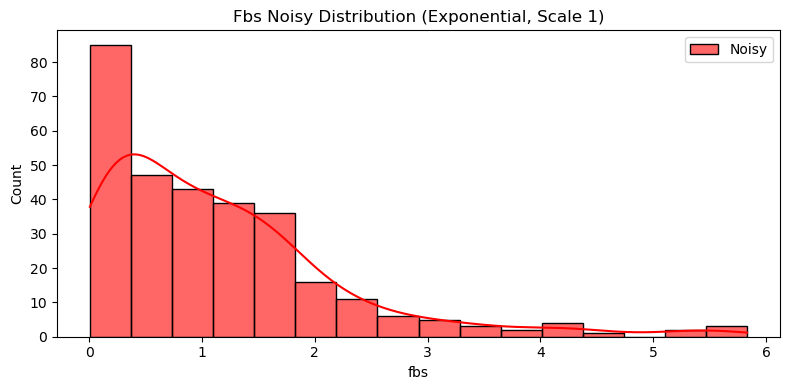

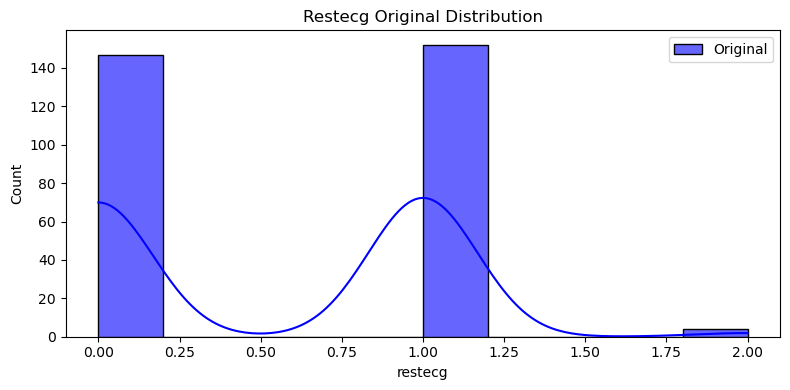

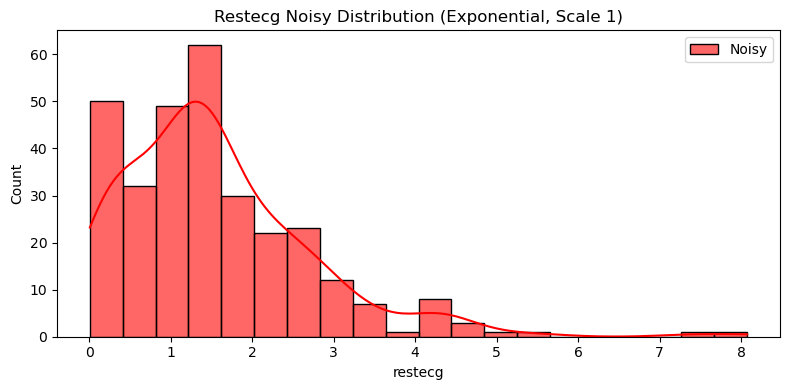

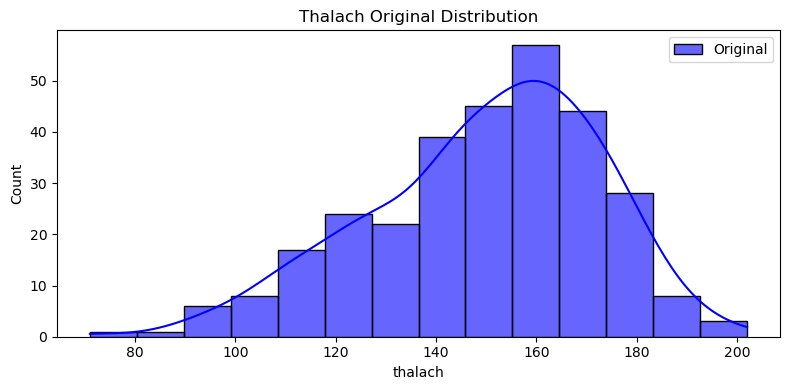

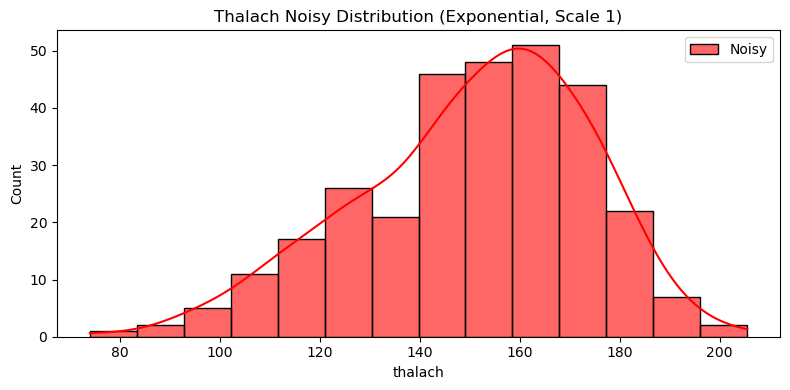

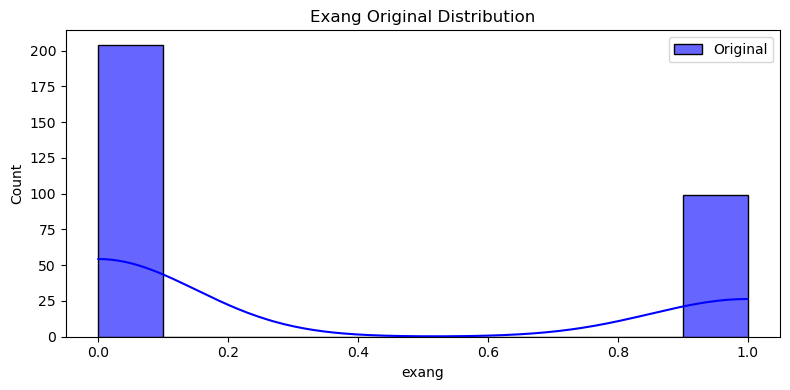

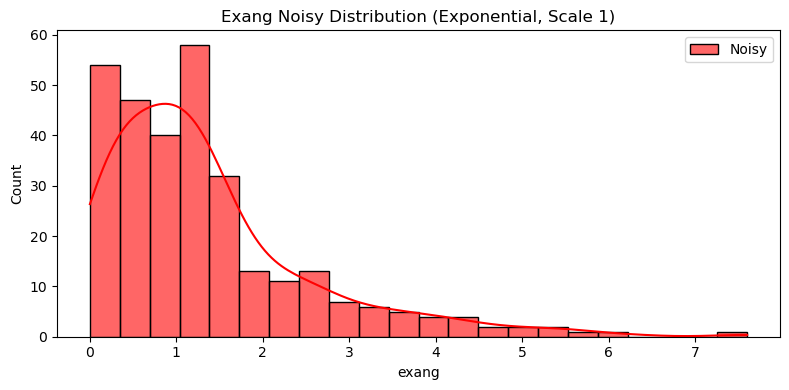

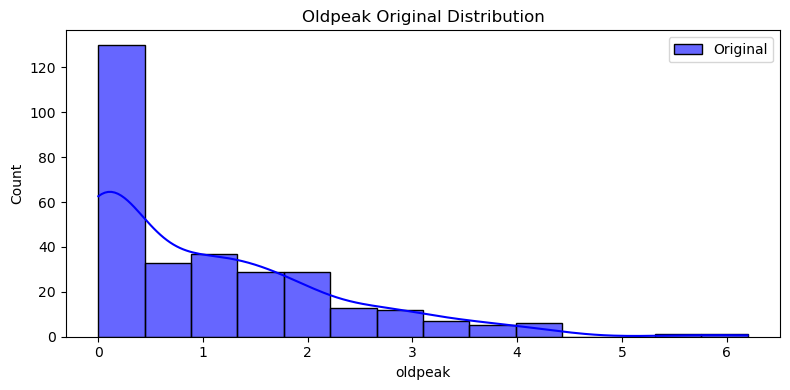

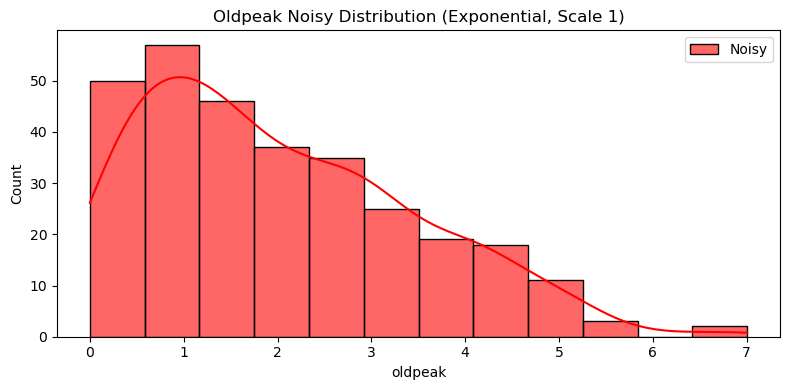

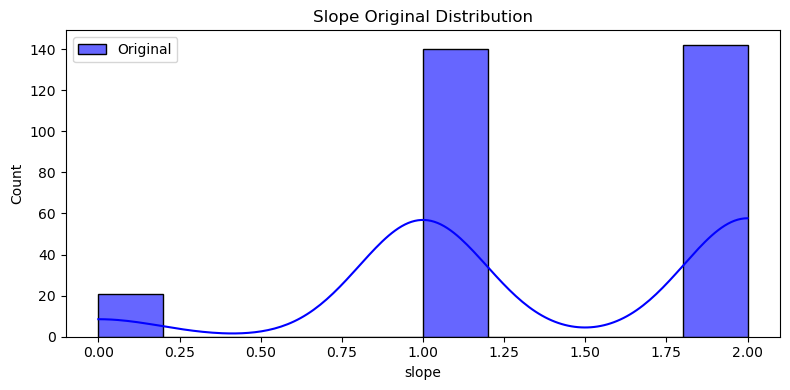

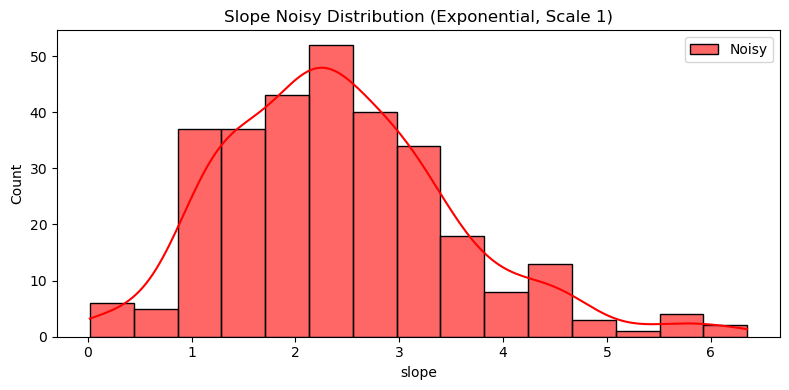

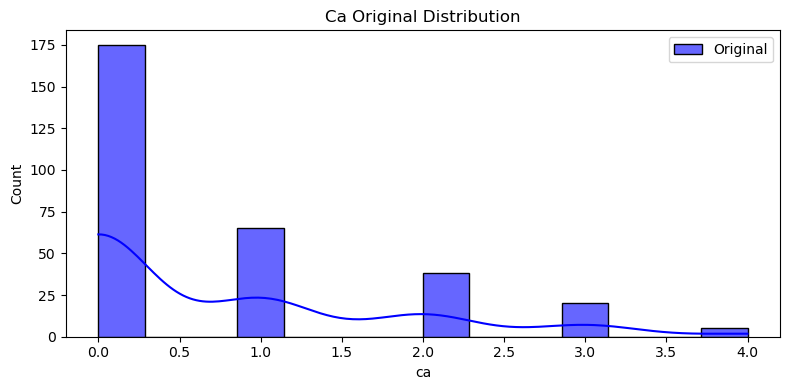

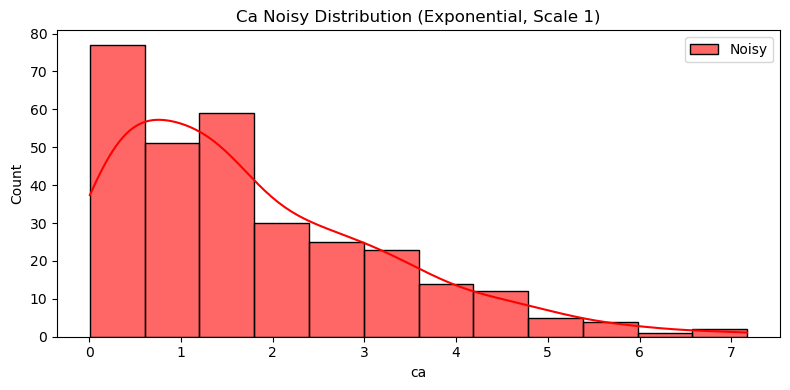

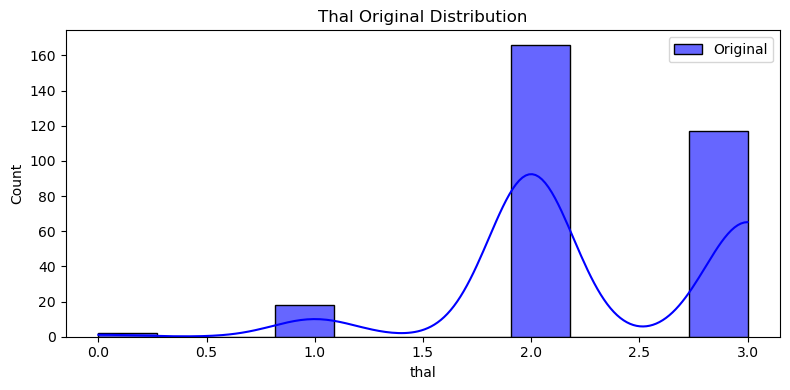

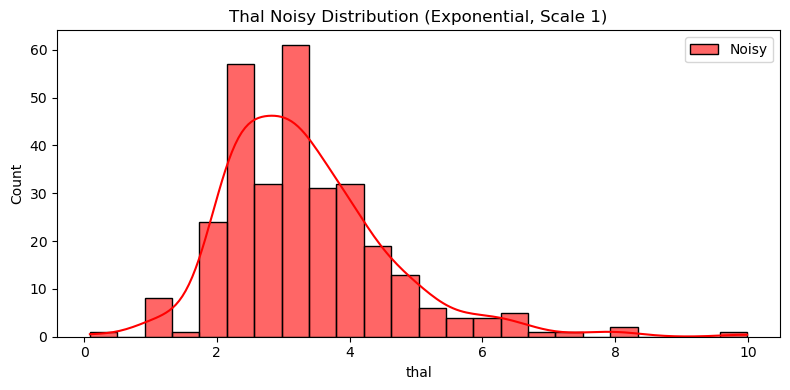

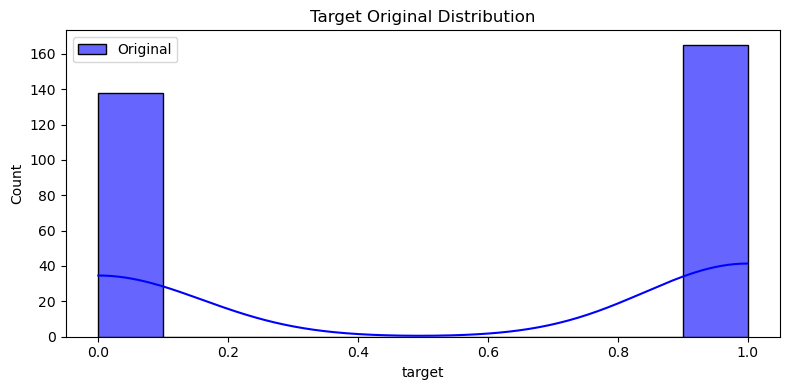

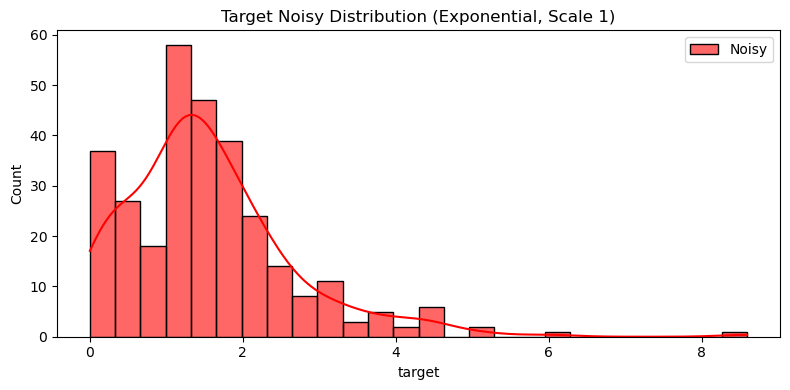

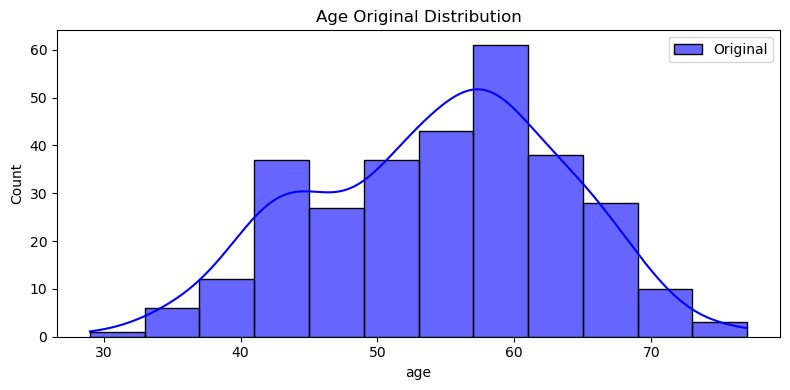

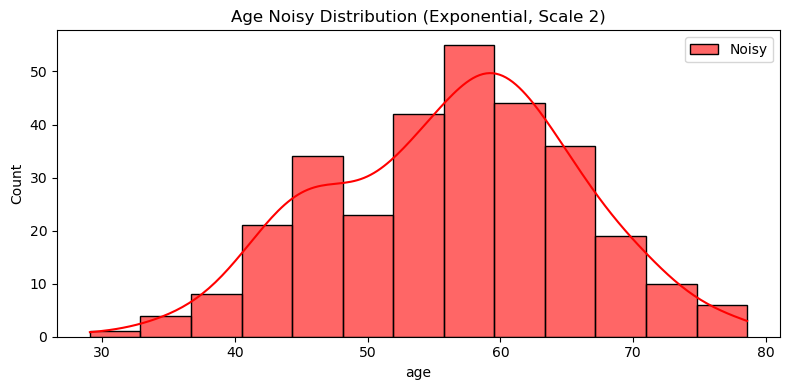

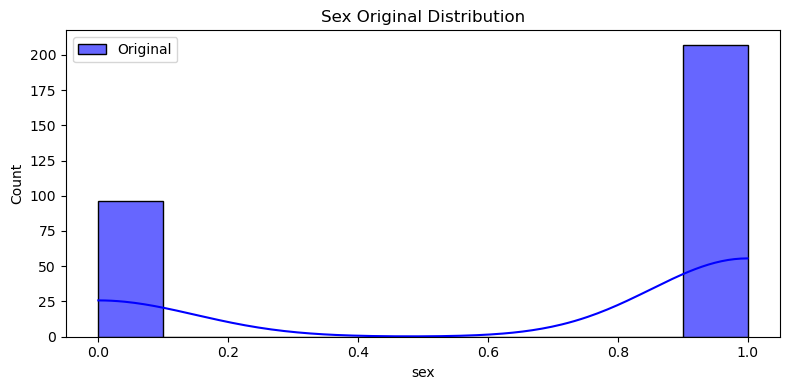

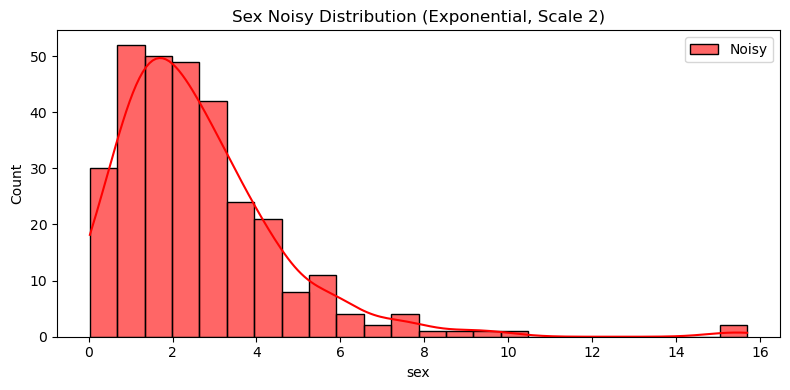

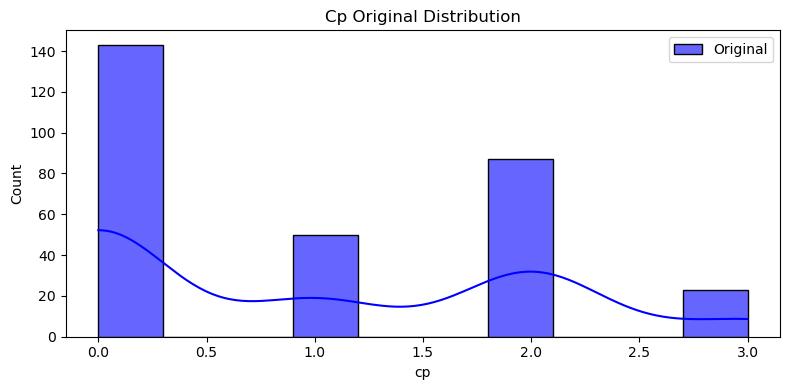

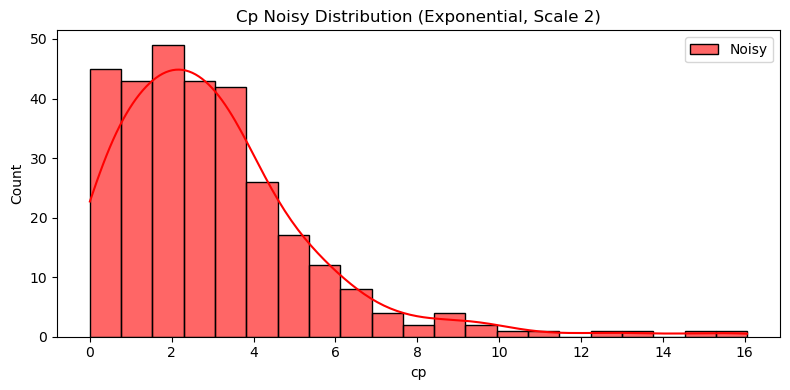

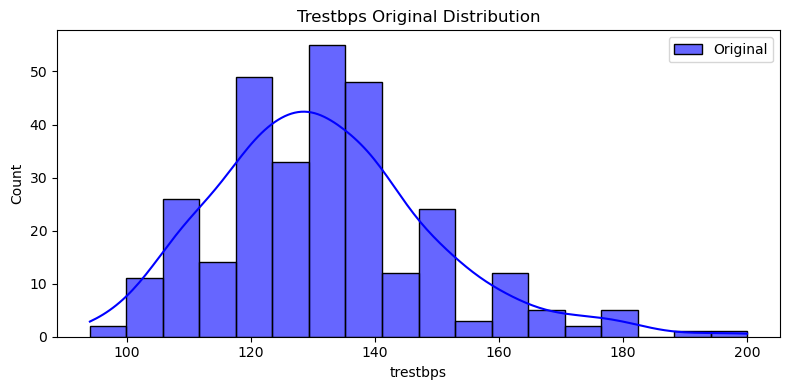

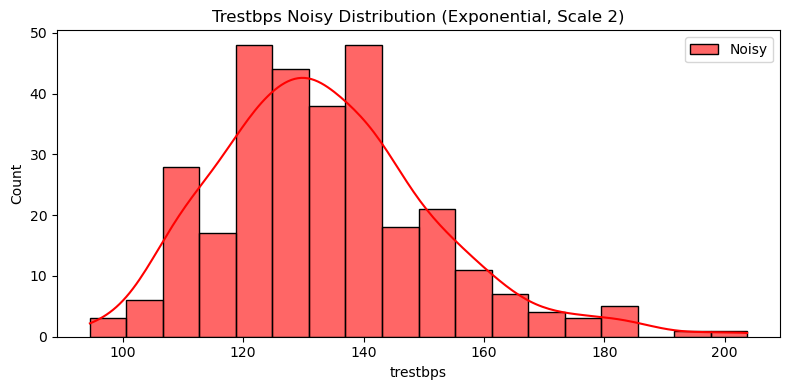

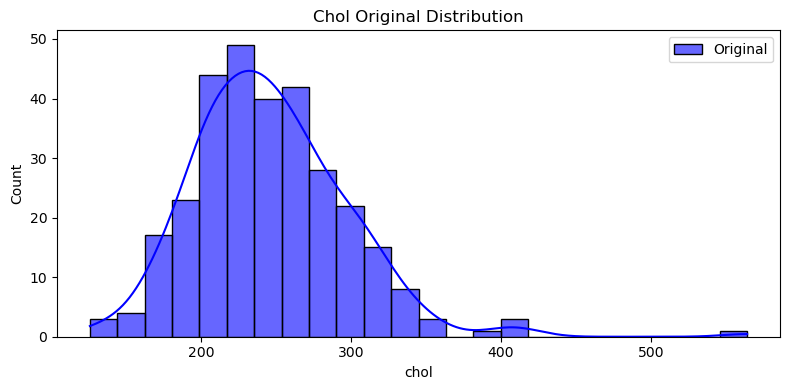

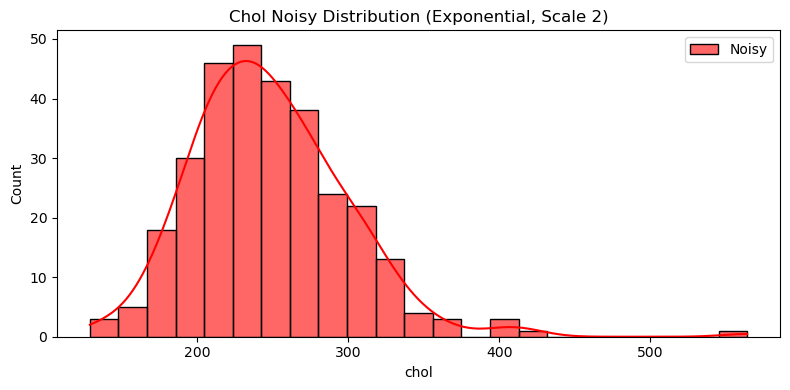

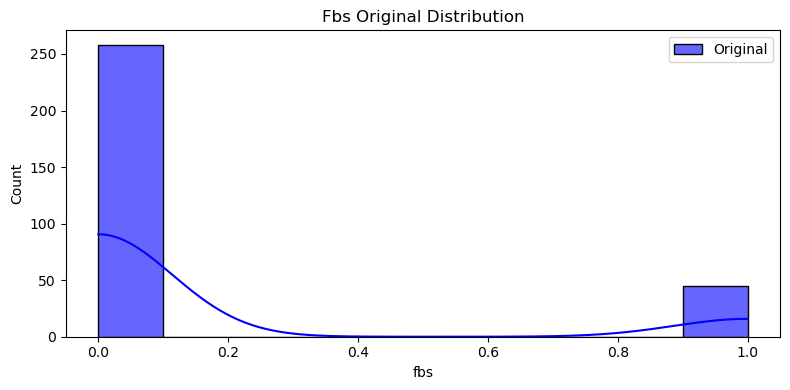

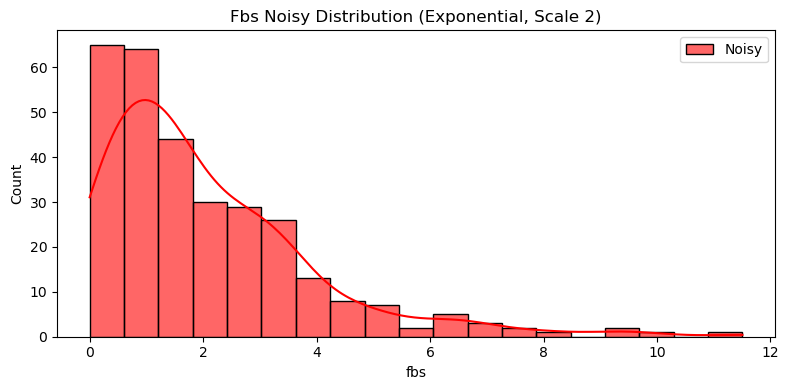

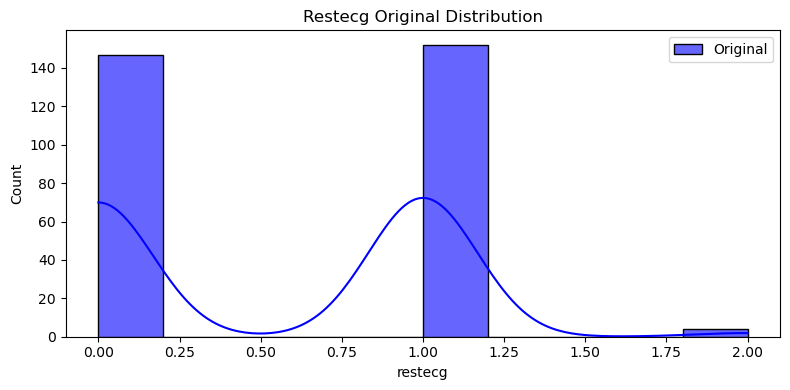

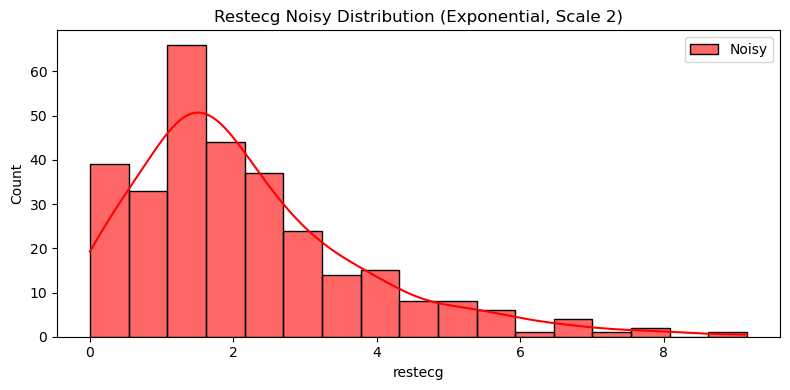

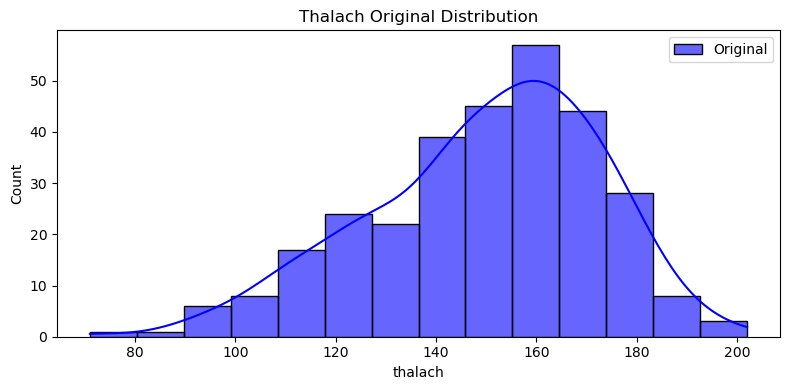

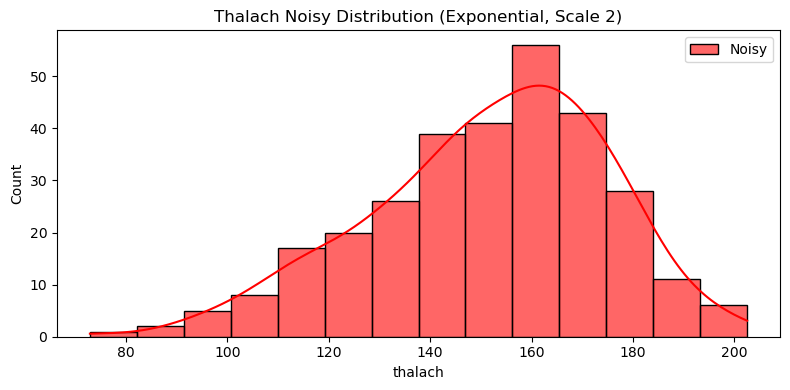

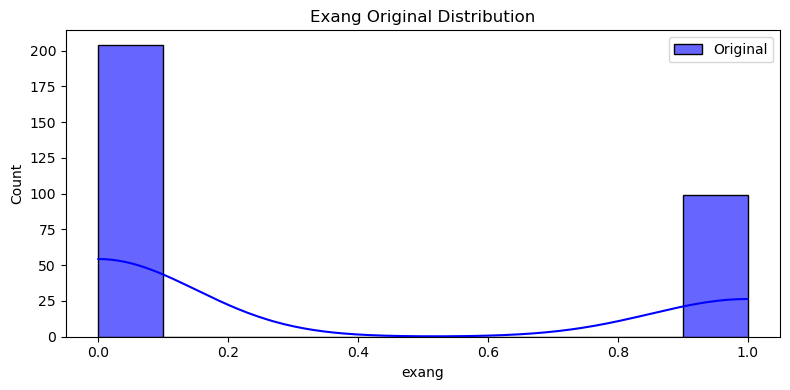

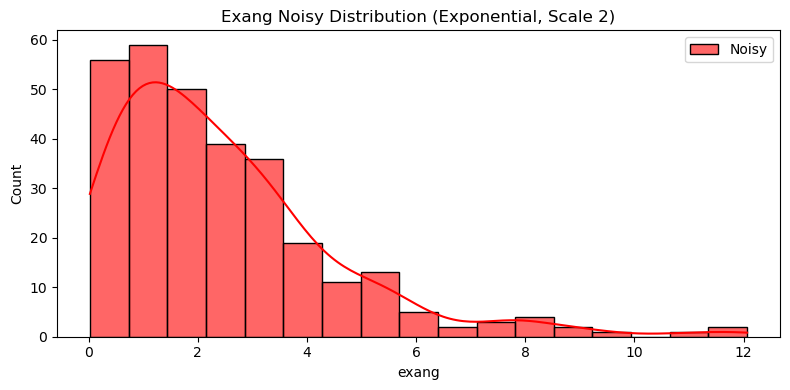

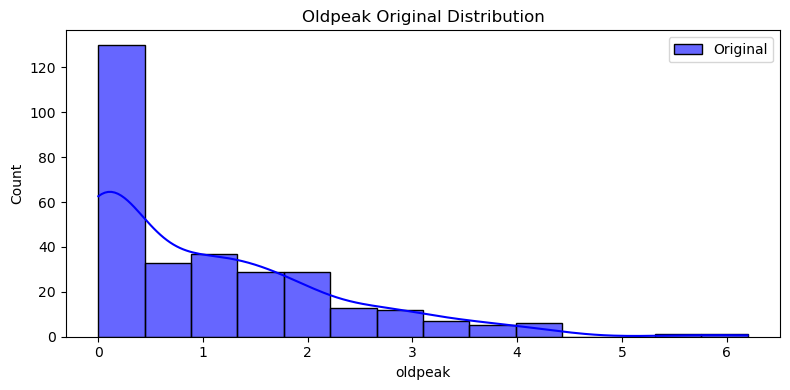

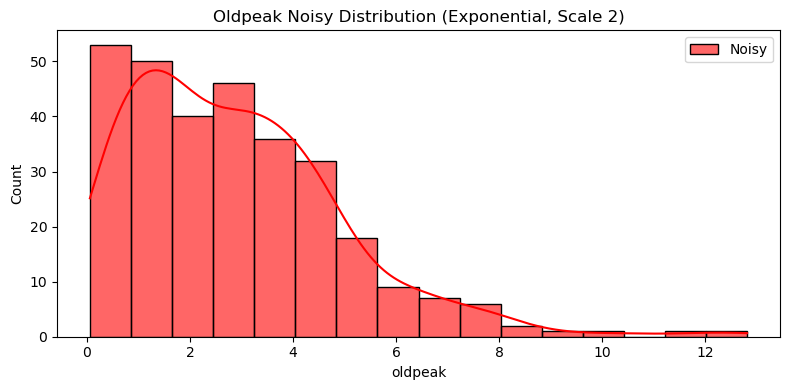

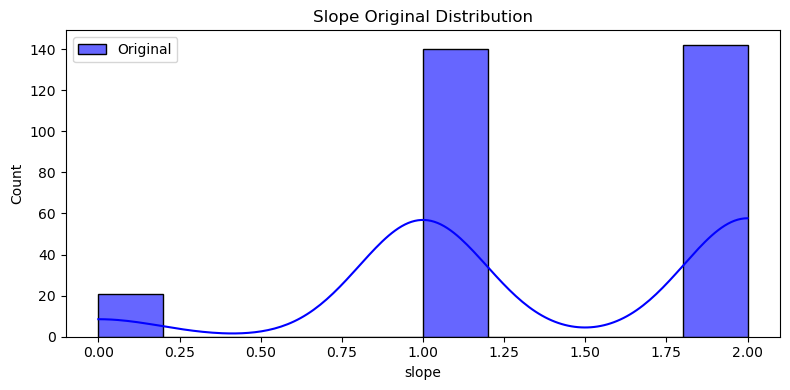

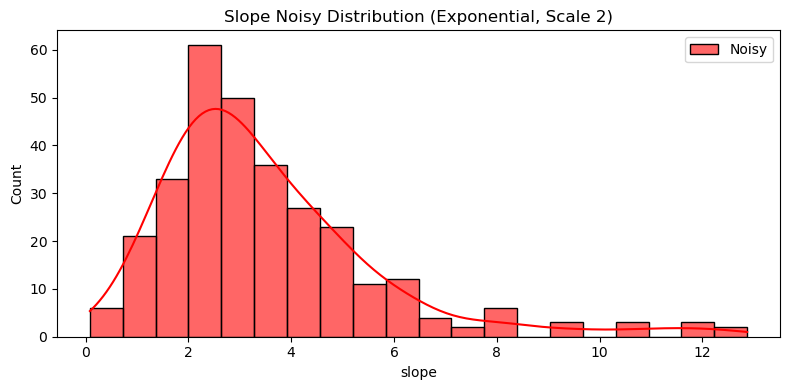

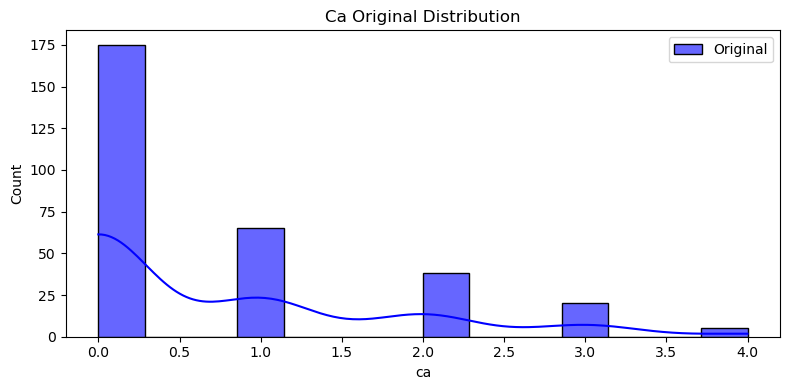

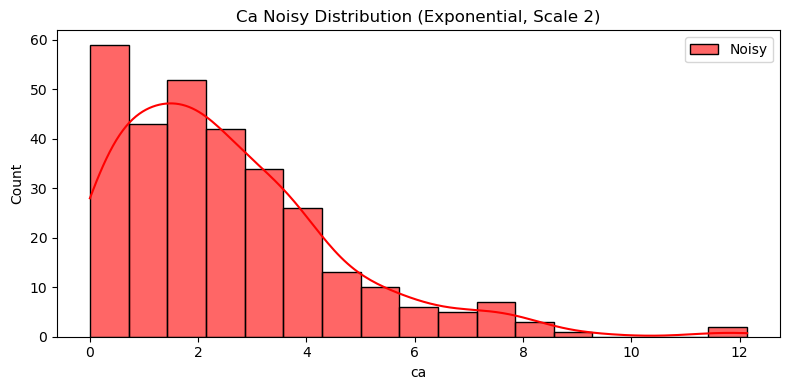

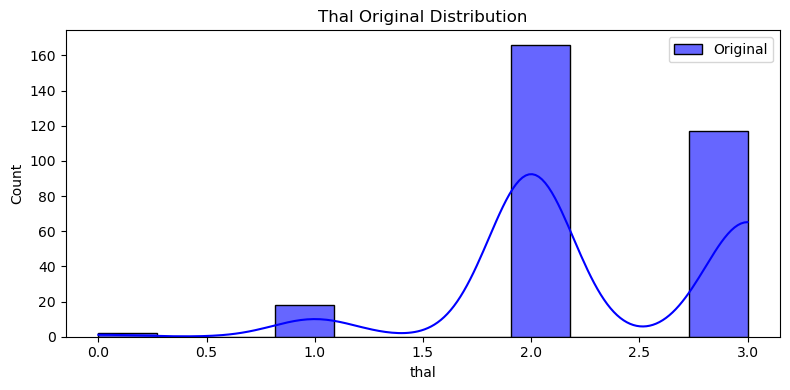

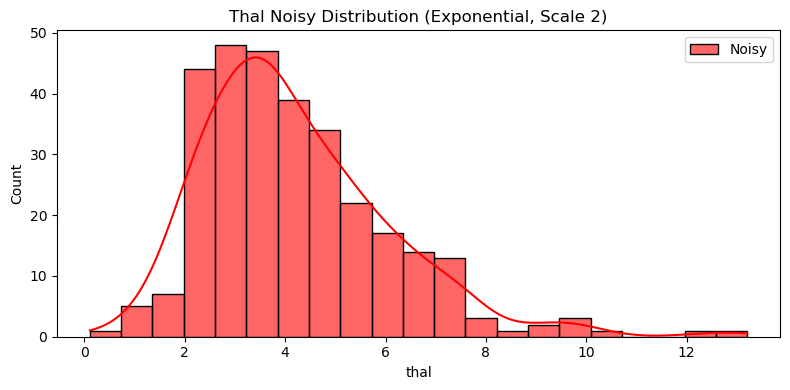

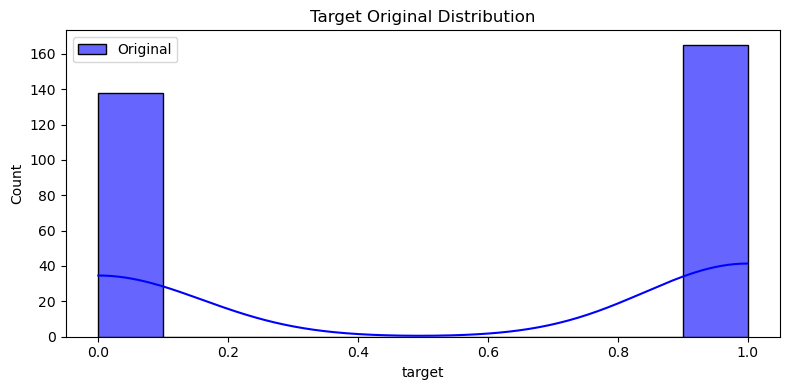

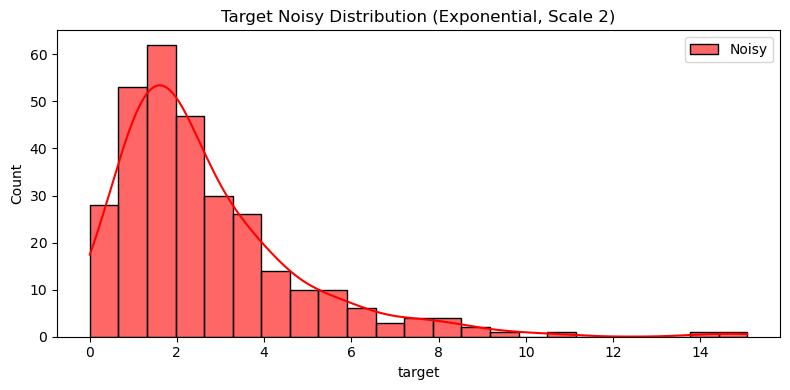

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.metrics import mean_squared_error
from scipy.stats import expon, laplace

# Read the heart-diseases.csv file
df = pd.read_csv("C:/Users/Admin/Desktop/project1/heart-diseases.csv")

# Function to apply the Laplace mechanism
def apply_laplace_mechanism(data, scale):
    return data + laplace.rvs(loc=0, scale=scale, size=data.size)

# Function to apply the exponential mechanism
def apply_exponential_mechanism(data, scale):
    return data + expon.rvs(scale=scale, size=data.size)

# Function to calculate MSE and RMSE
def calculate_mse_rmse(original, noisy):
    mse = mean_squared_error(original, noisy)
    rmse = math.sqrt(mse)
    return mse, rmse

# Function to calculate Mean and Median
def calculate_mean_median(data):
    mean_value = np.mean(data)
    median_value = np.median(data)
    return mean_value, median_value

# Scales for the Laplace and exponential mechanisms
scales = [0.5, 1, 2]

# Results storage for Laplace mechanism
laplace_results = []

# Results storage for exponential mechanism
exponential_results = []

# Plotting histograms for each feature and scale
for scale in scales:
    for feature in df.columns:
        original_data = df[feature]

        # Applying Laplace mechanism
        noisy_data_laplace = apply_laplace_mechanism(original_data, scale)

        # Applying Exponential mechanism
        noisy_data_exponential = apply_exponential_mechanism(original_data, scale)

        # Calculating MSE and RMSE for Laplace mechanism
        mse_laplace, rmse_laplace = calculate_mse_rmse(original_data, noisy_data_laplace)

        # Calculating Mean and Median for Laplace mechanism
        mean_laplace, median_laplace = calculate_mean_median(noisy_data_laplace)

        # Calculating MSE and RMSE for Exponential mechanism
        mse_exponential, rmse_exponential = calculate_mse_rmse(original_data, noisy_data_exponential)

        # Calculating Mean and Median for Exponential mechanism
        mean_exponential, median_exponential = calculate_mean_median(noisy_data_exponential)

        # Storing results for Laplace mechanism
        laplace_results.append({
            'Feature': feature.capitalize(),
            'Scale': scale,
            'MSE': mse_laplace,
            'RMSE': rmse_laplace,
            'Mean': mean_laplace,
            'Median': median_laplace
        })

        # Storing results for Exponential mechanism
        exponential_results.append({
            'Feature': feature.capitalize(),
            'Scale': scale,
            'MSE': mse_exponential,
            'RMSE': rmse_exponential,
            'Mean': mean_exponential,
            'Median': median_exponential
        })

# Creating DataFrames to display the results
laplace_results_df = pd.DataFrame(laplace_results)
exponential_results_df = pd.DataFrame(exponential_results)

# Displaying the results
print("Laplace Mechanism Results:")
print(laplace_results_df)
print("\nExponential Mechanism Results:")
print(exponential_results_df)

# Plotting histograms for each feature and scale for Laplace mechanism
for scale in scales:
    for feature in df.columns:
        original_data = df[feature]
        noisy_data = apply_laplace_mechanism(original_data, scale)

        plt.figure(figsize=(8, 4))
        sns.histplot(original_data, kde=True, color="blue", label='Original', alpha=0.6)
        plt.title(f'{feature.capitalize()} Original Distribution')
        plt.legend()
        plt.tight_layout()
        plt.show()

        plt.figure(figsize=(8, 4))
        sns.histplot(noisy_data, kde=True, color="red", label='Noisy', alpha=0.6)
        plt.title(f'{feature.capitalize()} Noisy Distribution (Laplace, Scale {scale})')
        plt.legend()
        plt.tight_layout()
        plt.show()

# Plotting histograms for each feature and scale for Exponential mechanism
for scale in scales:
    for feature in df.columns:
        original_data = df[feature]
        noisy_data = apply_exponential_mechanism(original_data, scale)

        plt.figure(figsize=(8, 4))
        sns.histplot(original_data, kde=True, color="blue", label='Original', alpha=0.6)
        plt.title(f'{feature.capitalize()} Original Distribution')
        plt.legend()
        plt.tight_layout()
        plt.show()

        plt.figure(figsize=(8, 4))
        sns.histplot(noisy_data, kde=True, color="red", label='Noisy', alpha=0.6)
        plt.title(f'{feature.capitalize()} Noisy Distribution (Exponential, Scale {scale})')
        plt.legend()
        plt.tight_layout()
        plt.show()
